In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d arnabbiswas1/microsoft-azure-predictive-maintenance

 90% 28.0M/31.0M [00:00<00:00, 45.8MB/s]
100% 31.0M/31.0M [00:00<00:00, 53.1MB/s]


In [ ]:
! unzip \*zip

Archive:  microsoft-azure-predictive-maintenance.zip
  inflating: PdM_errors.csv          
  inflating: PdM_failures.csv        
  inflating: PdM_machines.csv        
  inflating: PdM_maint.csv           
  inflating: PdM_telemetry.csv       


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
telemetry = pd.read_csv('PdM_telemetry.csv')
failures= pd.read_csv('PdM_failures.csv')
errors = pd.read_csv('PdM_errors.csv')
maint = pd.read_csv('PdM_maint.csv')
machines = pd.read_csv('PdM_machines.csv')

# **Exploration**

In [ ]:
telemetry.head()

datetime  machineID        volt      rotate    pressure  \
0  2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1  2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2  2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3  2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4  2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847  
3  41.122144  
4  25.990511

In [ ]:
failures.head()

datetime  machineID failure
0  2015-01-05 06:00:00          1   comp4
1  2015-03-06 06:00:00          1   comp1
2  2015-04-20 06:00:00          1   comp2
3  2015-06-19 06:00:00          1   comp4
4  2015-09-02 06:00:00          1   comp4

In [ ]:
errors.head()

datetime  machineID errorID
0  2015-01-03 07:00:00          1  error1
1  2015-01-03 20:00:00          1  error3
2  2015-01-04 06:00:00          1  error5
3  2015-01-10 15:00:00          1  error4
4  2015-01-22 10:00:00          1  error4

In [ ]:
maint.head()

datetime  machineID   comp
0  2014-06-01 06:00:00          1  comp2
1  2014-07-16 06:00:00          1  comp4
2  2014-07-31 06:00:00          1  comp3
3  2014-12-13 06:00:00          1  comp1
4  2015-01-05 06:00:00          1  comp4

In [ ]:
machines.head()

machineID   model  age
0          1  model3   18
1          2  model4    7
2          3  model3    8
3          4  model3    7
4          5  model3    2

In [ ]:
telemetry['datetime_new'] = pd.to_datetime(
    telemetry['datetime'],
    format="%Y-%m-%d %H:%M:%S"
)
print("---------------------------------------------Telemetry--------------------------------------------------")
print(telemetry.info())

failures['datetime_new'] = pd.to_datetime(
    failures['datetime'],
    format="%Y-%m-%d %H:%M:%S"
)
print("---------------------------------------------Machine Failure--------------------------------------------------")
print(failures.info())

errors['datetime_new'] = pd.to_datetime(
    errors['datetime'],
    format="%Y-%m-%d %H:%M:%S"
)
print("---------------------------------------------Error occured--------------------------------------------------")
print(errors.info())

---------------------------------------------Telemetry--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   datetime      876100 non-null  datetime64[ns]
 1   machineID     876100 non-null  int64         
 2   volt          876100 non-null  float64       
 3   rotate        876100 non-null  float64       
 4   pressure      876100 non-null  float64       
 5   vibration     876100 non-null  float64       
 6   datetime_new  876100 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1)
memory usage: 46.8 MB
None
---------------------------------------------Machine Failure--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 4 columns):
 #   Column        Non-Null Count  D

### EDN on telemetry data

In [ ]:
telemetry.describe()

machineID           volt         rotate       pressure  \
count  876100.000000  876100.000000  876100.000000  876100.000000   
mean       50.500000     170.777736     446.605119     100.858668   
std        28.866087      15.509114      52.673886      11.048679   
min         1.000000      97.333604     138.432075      51.237106   
25%        25.750000     160.304927     412.305714      93.498181   
50%        50.500000     170.607338     447.558150     100.425559   
75%        75.250000     181.004493     482.176600     107.555231   
max       100.000000     255.124717     695.020984     185.951998   

           vibration  
count  876100.000000  
mean       40.385007  
std         5.370361  
min        14.877054  
25%        36.777299  
50%        40.237247  
75%        43.784938  
max        76.791072

In [ ]:
telemetry['datetime'] = pd.to_datetime(
    telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")


In [ ]:
plot_df = telemetry.loc[(telemetry['machineID'] == 1) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] < pd.to_datetime('2015-02-01')), ['datetime', 'volt']]


fig = px.line(x=plot_df['datetime'].values, y=plot_df['volt'].values, title='Voltage over time', template='plotly_dark')
fig.update_layout(xaxis_title='Time', yaxis_title='Voltage')
fig.show()

In [ ]:
plot_df = telemetry.loc[(telemetry['machineID'] == 1) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] < pd.to_datetime('2015-02-01')), ['datetime', 'rotate']]


fig = px.line(x=plot_df['datetime'].values, y=plot_df['rotate'].values, title='rotate over time', template='plotly_dark')
fig.update_layout(xaxis_title='Time', yaxis_title='rotate(tempreture)')
fig.show()

In [ ]:
machine_id = telemetry['machineID'].unique()
dfs = []

def sort_by_date(df, col):
    return df.sort_values(by=col)

for ID in machine_id:
    temp_df = telemetry[telemetry['machineID']==ID]
    temp_df = sort_by_date(temp_df, 'datetime_new')
    dfs.append(temp_df)

print("No. of Machines in Telemetry = {}".format(len(dfs)))

No. of Machines in Telemetry = 100


In [ ]:
machine_id = telemetry['machineID'].unique()
fail_dfs, error_dfs = [],[]

def sort_by_date(df, col):
    return df.sort_values(by=col)

for ID in machine_id:
    fail_temp = failures[failures['machineID']==ID]
    error_temp = errors[errors['machineID']==ID]
    fail_temp = sort_by_date(fail_temp, 'datetime_new')
    error_temp = sort_by_date(error_temp, 'datetime_new')
    fail_dfs.append(fail_temp)
    error_dfs.append(error_temp)

print("No. of Machines fail dfs = {}".format(len(fail_dfs)))
print("No. of Machines error dfs = {}".format(len(error_dfs)))

No. of Machines fail dfs = 100
No. of Machines error dfs = 100


In [ ]:
trace = go.Scatter(x=dfs[0]['datetime_new'], y=dfs[0]['volt'], mode='lines', name='Voltage')
trace_error = go.Scatter(x=error_dfs[0]['datetime_new'], mode='markers', name='error', marker=dict(size=10, color='yellow'))
trace_dots = go.Scatter(x=fail_dfs[0]['datetime_new'], mode='markers', name='failures', marker=dict(size=10, color='red'))

fig = go.Figure(data=[trace,trace_error,trace_dots])

fig.update_layout(
    title = "Errors and Failures with voltage variations",
    xaxis_title = "Date",
    yaxis_title = "Voltage level"
)

fig.show()

In [ ]:
trace = go.Scatter(x=dfs[0]['datetime_new'], y=dfs[0]['rotate'], mode='lines', name='rotation')
trace_error = go.Scatter(x=error_dfs[0]['datetime_new'], mode='markers', name='error', marker=dict(size=10, color='yellow'))
trace_dots = go.Scatter(x=fail_dfs[0]['datetime_new'], mode='markers', name='failures', marker=dict(size=10, color='red'))

fig = go.Figure(data=[trace,trace_error,trace_dots])

fig.update_layout(
    title = "Errors and Failures with rotation variations",
    xaxis_title = "Date",
    yaxis_title = "Rotation level"
)

fig.show()

In [ ]:
trace = go.Scatter(x=dfs[0]['datetime_new'], y=dfs[0]['pressure'], mode='lines', name='pressure')
trace_error = go.Scatter(x=error_dfs[0]['datetime_new'], mode='markers', name='error', marker=dict(size=10, color='yellow'))
trace_dots = go.Scatter(x=fail_dfs[0]['datetime_new'], mode='markers', name='failures', marker=dict(size=10, color='red'))

fig = go.Figure(data=[trace,trace_error,trace_dots])

fig.update_layout(
    title = "Errors and Failures with pressure variations",
    xaxis_title = "Date",
    yaxis_title = "pressure level"
)

fig.show()

In [ ]:
trace = go.Scatter(x=dfs[0]['datetime_new'], y=dfs[0]['vibration'], mode='lines', name='vibration')
trace_error = go.Scatter(x=error_dfs[0]['datetime_new'], mode='markers', name='error', marker=dict(size=10, color='yellow'))
trace_dots = go.Scatter(x=fail_dfs[0]['datetime_new'], mode='markers', name='failures', marker=dict(size=10, color='red'))

fig = go.Figure(data=[trace,trace_error,trace_dots])

fig.update_layout(
    title = "Errors and Failures with vibration variations",
    xaxis_title = "Date",
    yaxis_title = "vibration level"
)

fig.show()

In [ ]:
trace_error = go.Scatter(x=error_dfs[0]['datetime_new'],y=[0]*len(error_dfs[0]['datetime_new']), mode='markers', name='error', marker=dict(size=10, color='yellow'))
trace_dots = go.Scatter(x=fail_dfs[0]['datetime_new'],y=[1]*len(error_dfs[0]['datetime_new']), mode='markers', name='failures', marker=dict(size=10, color='red'))

fig = go.Figure(data=[trace_error,trace_dots])
fig.update_layout(
    title="Error and Failure",
    xaxis_title = "Data",)

fig.show()

### EDA on Errors Data

In [ ]:
errors['errorID'] = errors['errorID'].astype('object')

print(f"Total number of error records: {len(errors.index)}")
errors.head()

Total number of error records: 3919


datetime  machineID errorID        datetime_new  error1  error2  \
0  2015-01-03 07:00:00          1  error1 2015-01-03 07:00:00       1       0   
1  2015-01-03 20:00:00          1  error3 2015-01-03 20:00:00       0       0   
2  2015-01-04 06:00:00          1  error5 2015-01-04 06:00:00       0       0   
3  2015-01-10 15:00:00          1  error4 2015-01-10 15:00:00       0       0   
4  2015-01-22 10:00:00          1  error4 2015-01-22 10:00:00       0       0   

   error3  error4  error5  
0       0       0       0  
1       1       0       0  
2       0       0       1  
3       0       1       0  
4       0       1       0

In [ ]:
fig = px.bar(x=errors['errorID'].values,
             title='Count of Errors', template='none', color=errors['errorID'].values)
fig.update_layout(xaxis_title='Error Type', yaxis_title='Count',xaxis={'categoryorder':'total descending'})

# Show the plot
fig.show()

<Axes: title={'center': 'Number of errors for MachineID'}>

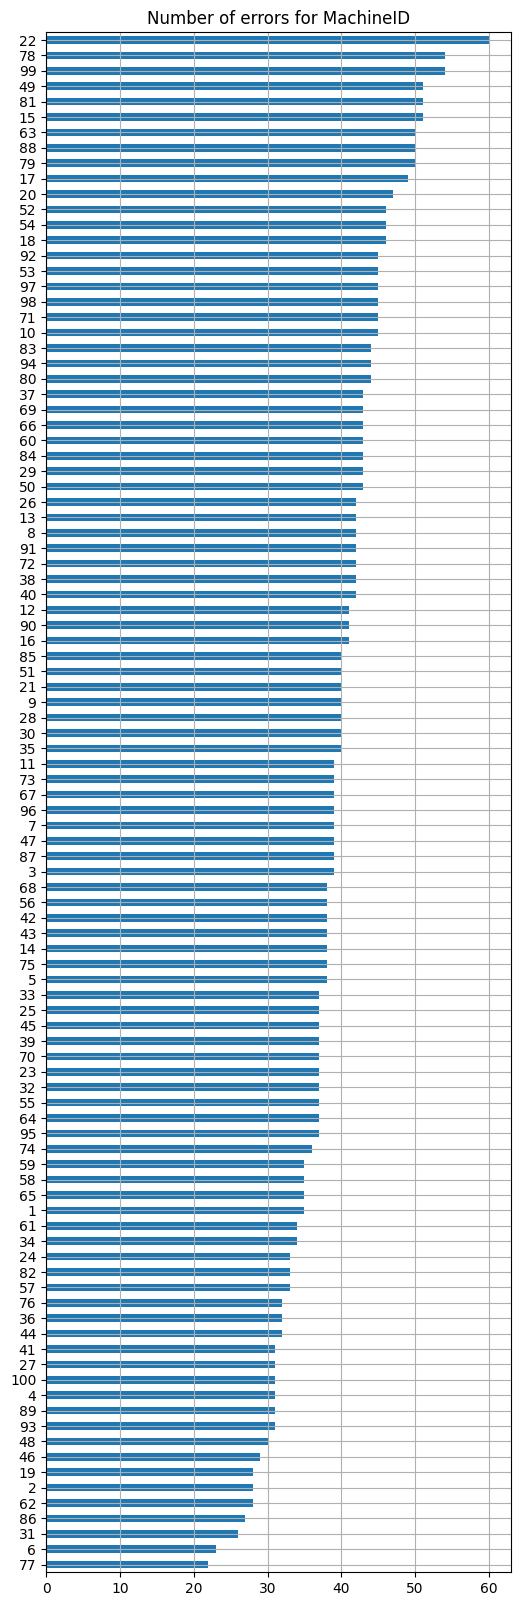

In [ ]:
errors["machineID"].value_counts(
                normalize=False, dropna=False).sort_values().plot(
                kind='barh', figsize=(6, 20), grid=True,
                title="Number of errors for MachineID")

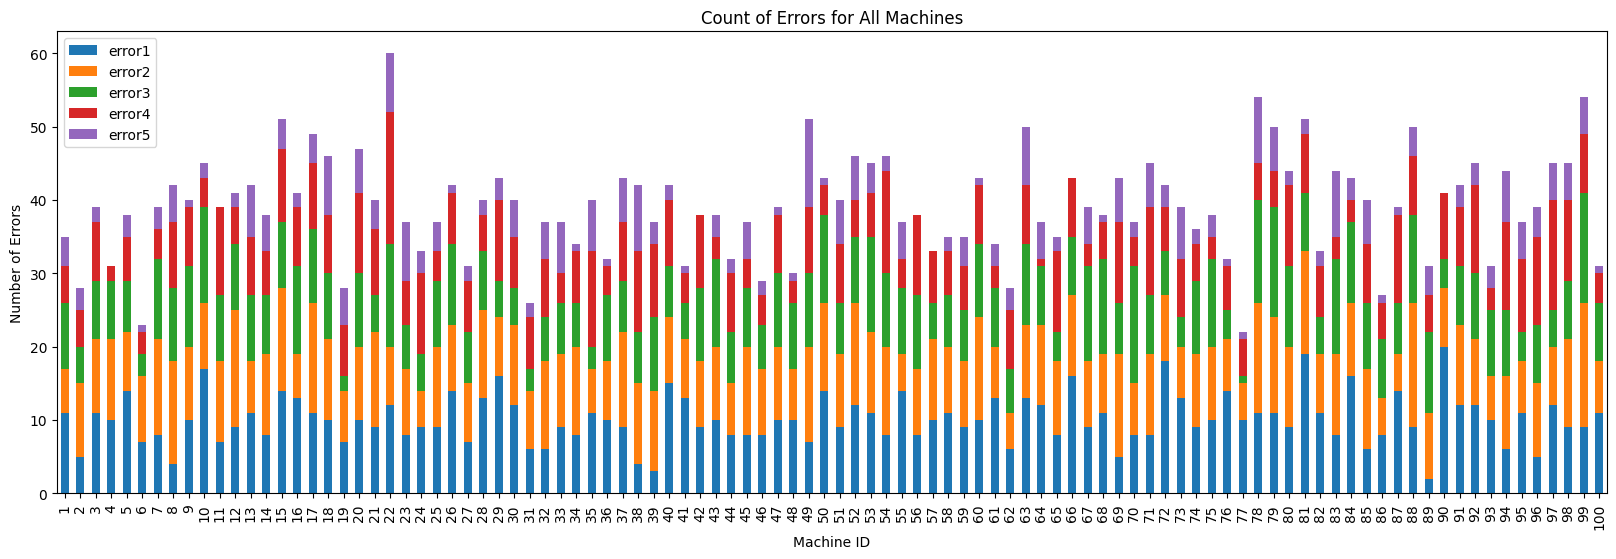

In [ ]:
error_cnt = errors.groupby(["machineID", "errorID"]).size().reset_index()
error_cnt.columns = ["machineID", "errorID", "error_val"]
error_cnt_pivot = pd.pivot(error_cnt, index="machineID", columns="errorID", values="error_val").rename_axis(None, axis=1)
error_cnt_pivot.plot.bar(stacked=True, figsize=(20, 6), title="Count of Errors for All Machines")
plt.xlabel("Machine ID")
plt.ylabel("Number of Errors");

### EDA on Maintainence Data

In [ ]:
maint['comp'] = maint['comp'].astype('object')

print(f"Total number of maintenance records: {len(maint.index)}")
maint.head()

Total number of maintenance records: 3238


datetime  machineID   comp  comp1_maint  comp2_maint  \
4  2015-01-05 06:00:00        1.0  comp4          0.0          0.0   
5  2015-01-05 06:00:00        1.0  comp1          0.0          0.0   
6  2015-01-20 06:00:00        1.0  comp3          0.0          0.0   
7  2015-01-20 06:00:00        1.0  comp1          1.0          0.0   
8  2015-02-04 06:00:00        1.0  comp4          1.0          0.0   

   comp3_maint  comp4_maint  
4          0.0          1.0  
5          1.0          0.0  
6          1.0          0.0  
7          0.0          0.0  
8          0.0          0.0

In [ ]:
fig = px.bar(x=maint['comp'].values,
             title='Count of Comp', template='none', color=maint['comp'].values) #
fig.update_layout(xaxis_title='Comp Type', yaxis_title='Count',xaxis={'categoryorder':'total descending'})
fig.show()

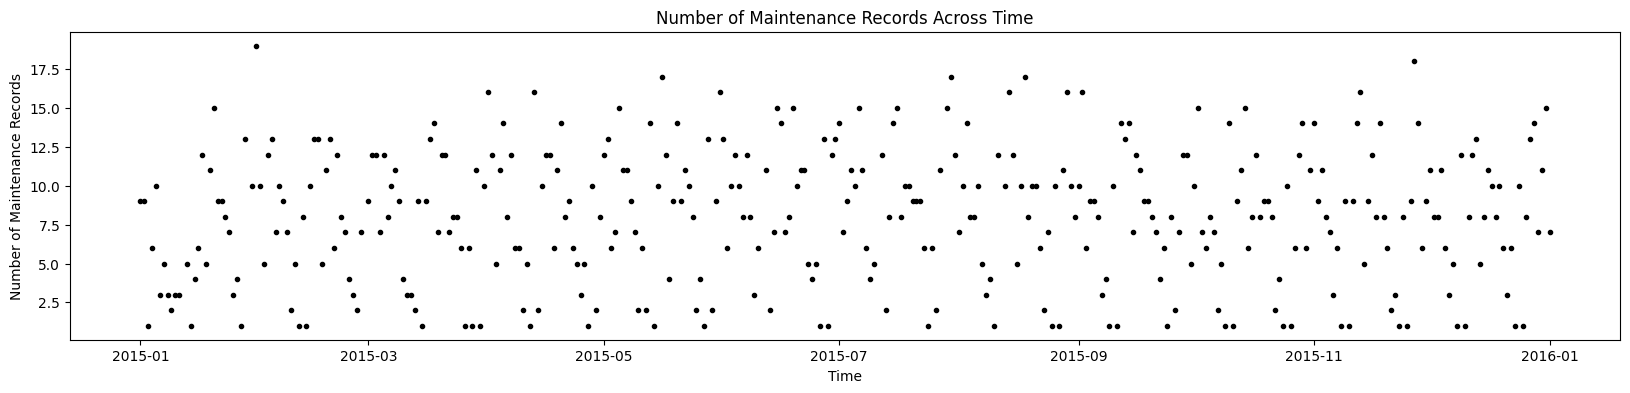

In [ ]:

maint['datetime'] = pd.to_datetime(maint['datetime'])

maint['datetime'].dt.date.value_counts().plot(
    style="k.",
    figsize=(20, 4),
    title="Number of Maintenance Records Across Time")
plt.ylabel("Number of Maintenance Records")
plt.xlabel("Time")
plt.show()


In [ ]:
maint['datetime'] = pd.to_datetime(
    maint['datetime'], format="%Y-%m-%d %H:%M:%S")
maint['comp'] = maint['comp'].astype('object')

In [ ]:
maint_grouped = maint.copy()
maint_grouped['year_month'] = maint_grouped['datetime'].dt.to_period('W')

maint_grouped = maint_grouped.join(pd.get_dummies(maint_grouped['comp']))

maint_grouped = maint_grouped.groupby('year_month').agg({'comp': 'count',
                                                 'comp1': 'sum',
                                                 'comp2': 'sum',
                                                 'comp3': 'sum',
                                                 'comp4': 'sum',
                                                }).reset_index()

maint_grouped['year_month'] = maint_grouped['year_month'].astype(str)

In [ ]:
fig = px.line(maint_grouped, x='year_month', y=['comp1', 'comp2', 'comp3', 'comp4'],
              title='Count of mantainance over time', template='plotly_dark')
fig.update_layout(xaxis_title='Time', yaxis_title='Count')
fig.show()

### EDA on Failure Data

In [ ]:
failures['datetime'] = pd.to_datetime(
    failures['datetime'], format="%Y-%m-%d %H:%M:%S")
failures['failure'] = failures['failure'].astype('object')

print("Total number of failures: %d" % len(failures.index))
failures.head()

Total number of failures: 761


datetime  machineID failure        datetime_new
0 2015-01-05 06:00:00          1   comp4 2015-01-05 06:00:00
1 2015-03-06 06:00:00          1   comp1 2015-03-06 06:00:00
2 2015-04-20 06:00:00          1   comp2 2015-04-20 06:00:00
3 2015-06-19 06:00:00          1   comp4 2015-06-19 06:00:00
4 2015-09-02 06:00:00          1   comp4 2015-09-02 06:00:00

In [ ]:
fig = px.bar(x=failures['failure'].values, title='Count of Failures', template='plotly_dark', color=failures['failure'].values)
fig.update_layout(xaxis_title='Failure Type', yaxis_title='Count')
fig.show()

In [ ]:
failu_grouped = failures.copy()
failu_grouped['year_month'] = failu_grouped['datetime'].dt.to_period('W')

failu_grouped = failu_grouped.join(pd.get_dummies(failu_grouped['failure']))

failu_grouped = failu_grouped.groupby('year_month').agg({'failure': 'count',
                                                    'comp1': 'sum',
                                                    'comp2': 'sum',
                                                    'comp3': 'sum',
                                                    'comp4': 'sum',
                                                   }).reset_index()

failu_grouped['year_month'] = failu_grouped['year_month'].astype(str)

In [ ]:
fig = px.line(failu_grouped, x='year_month', y=['comp1', 'comp2', 'comp3', 'comp4'],
              title='Count of failures over time', template='plotly_dark')
fig.update_layout(xaxis_title='Time', yaxis_title='Count')
fig.show()

### Statistical Graphs

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.1 MB/s eta 0:00:00


<Figure size 1200x500 with 0 Axes>

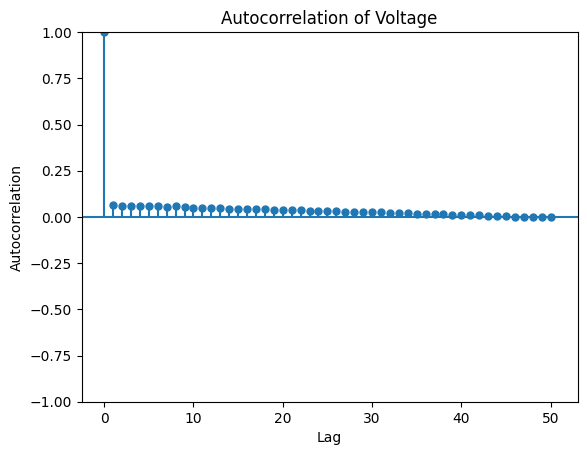

<Figure size 1200x500 with 0 Axes>

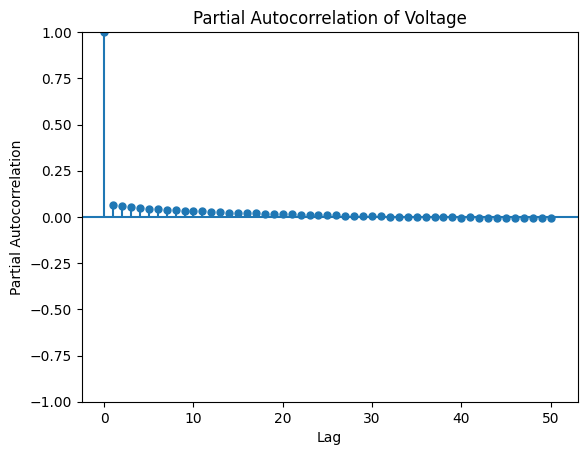

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming you have loaded your telemetry data into a DataFrame named 'telemetry_data'

# Convert the 'datetime' column to datetime format if it's not already
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'])

# Set the 'datetime' column as the index
telemetry.set_index('datetime', inplace=True)

# Plot autocorrelation
plt.figure(figsize=(12, 5))
plot_acf(telemetry['volt'], lags=50, title='Autocorrelation of Voltage')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot partial autocorrelation
plt.figure(figsize=(12, 5))
plot_pacf(telemetry['volt'], lags=50, title='Partial Autocorrelation of Voltage')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()


<Figure size 1200x500 with 0 Axes>

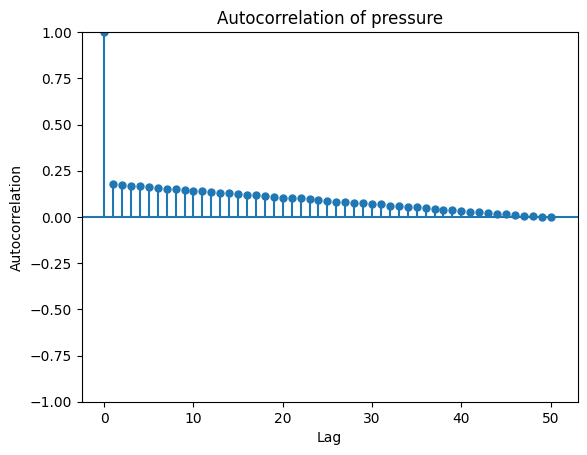

<Figure size 1200x500 with 0 Axes>

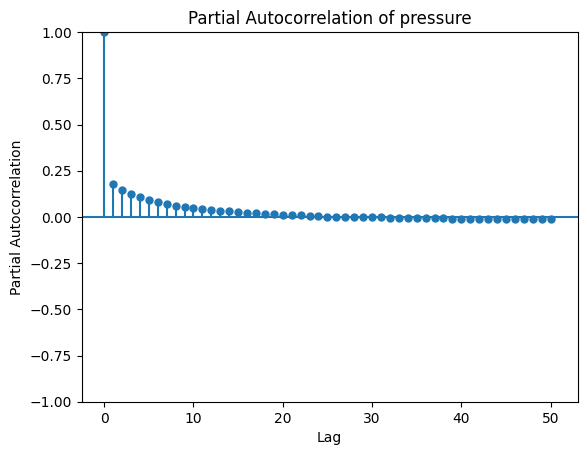

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming you have loaded your telemetry data into a DataFrame named 'telemetry_data'

# Convert the 'datetime' column to datetime format if it's not already
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'])

# Set the 'datetime' column as the index
telemetry.set_index('datetime', inplace=True)

# Plot autocorrelation
plt.figure(figsize=(12, 5))
plot_acf(telemetry['pressure'], lags=50, title='Autocorrelation of pressure')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot partial autocorrelation
plt.figure(figsize=(12, 5))
plot_pacf(telemetry['pressure'], lags=50, title='Partial Autocorrelation of pressure')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()


# **Modeling**

In [ ]:
#failures csv
failures['comp1_fail']=0
failures['comp2_fail']=0
failures['comp3_fail']=0
failures['comp4_fail']=0
counter=0
for itera in failures.failure:
    if itera=="comp1":
        failures.at[counter,'comp1_fail']=1
    elif itera=="comp2":
        failures.at[counter,'comp2_fail']=1
    elif itera=="comp3":
        failures.at[counter,'comp3_fail']=1
    elif itera=="comp4":
        failures.at[counter,'comp4_fail']=1
    counter=counter+1
data3=failures.drop(columns=['failure'])
#ready faulure csv
#data4=data4.drop(columns=['model'])

In [ ]:
data3.head(2)

datetime  machineID  comp1_fail  comp2_fail  comp3_fail  \
0  2015-01-05 06:00:00          1           0           0           0   
1  2015-03-06 06:00:00          1           1           0           0   

   comp4_fail  
0           1  
1           0

In [ ]:
#error  csv
errors['error1']=0
errors['error2']=0
errors['error3']=0
errors['error4']=0
errors['error5']=0
counter = 0

for itera in errors.errorID:
    if itera=="error1":
        errors.at[counter,'error1']=1
    elif itera=="error2":
        errors.at[counter,'error2']=1
    elif itera=="error3":
        errors.at[counter,'error3']=1
    elif itera=="error4":
        errors.at[counter,'error4']=1
    elif itera=="error5":
        errors.at[counter,'error5']=1
    counter=counter+1

data1=errors.drop(columns=['errorID'])

In [ ]:
data1.head(2)

datetime  machineID  error1  error2  error3  error4  error5
0  2015-01-03 07:00:00          1       1       0       0       0       0
1  2015-01-03 20:00:00          1       0       0       1       0       0

In [ ]:
data4=machines.drop(columns=['model'])

In [ ]:
from threading import main_thread
#maintanance csv
maint = maint[maint['datetime'] >= '2015']
maint['comp1_maint']=0
maint['comp2_maint']=0
maint['comp3_maint']=0
maint['comp4_maint']=0
counter=0
for itera in maint.comp:
    if itera=="comp1":
        maint.at[counter,'comp1_maint']=1
    elif itera=="comp2":
        maint.at[counter,'comp2_maint']=1
    elif itera=="comp3":
        maint.at[counter,'comp3_maint']=1
    elif itera=="comp4":
        maint.at[counter,'comp4_maint']=1
    counter=counter+1
data5=maint.drop(columns=['comp'])

<ipython-input-71-1554d6b350ed>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-71-1554d6b350ed>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-71-1554d6b350ed>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-71-1554d6b

In [ ]:
data5.head(5)

datetime  machineID  comp1_maint  comp2_maint  comp3_maint  \
4  2015-01-05 06:00:00        1.0          0.0          0.0          0.0   
5  2015-01-05 06:00:00        1.0          0.0          0.0          1.0   
6  2015-01-20 06:00:00        1.0          0.0          0.0          1.0   
7  2015-01-20 06:00:00        1.0          1.0          0.0          0.0   
8  2015-02-04 06:00:00        1.0          1.0          0.0          0.0   

   comp4_maint  
4          1.0  
5          0.0  
6          0.0  
7          0.0  
8          0.0

In [ ]:
#fix csv files format all in one file

output1 = pd.merge(telemetry, data1 ,on=['datetime','machineID'],how='left')
#output1 = output1.replace(np.nan, 0)
#output1 = output1.groupby(['machineID','datetime']).max()

output2 = pd.merge(output1, data3 ,on=['datetime','machineID'],how='left')
#output2 = output2.replace(np.nan, 0)
#output2 = output2.groupby(['machineID','datetime']).max()


output3 = pd.merge(output2, data5 ,on=['datetime','machineID'],how='left')
#output3 = output3.replace(np.nan, 0)
#output3 = output3.groupby(['machineID','datetime']).max()

final_output = pd.merge(output3, data4 ,on='machineID',how='left')
final_output = final_output.replace(np.nan, 0)
final_output = final_output.groupby(['machineID','datetime']).max()
final_output=final_output.reset_index()

final_output.head(5)

machineID             datetime        volt      rotate    pressure  \
0          1  2015-01-01 06:00:00  176.217853  418.504078  113.077935   
1          1  2015-01-01 07:00:00  162.879223  402.747490   95.460525   
2          1  2015-01-01 08:00:00  170.989902  527.349825   75.237905   
3          1  2015-01-01 09:00:00  162.462833  346.149335  109.248561   
4          1  2015-01-01 10:00:00  157.610021  435.376873  111.886648   

   vibration  error1  error2  error3  error4  error5  comp1_fail  comp2_fail  \
0  45.087686     0.0     0.0     0.0     0.0     0.0         0.0         0.0   
1  43.413973     0.0     0.0     0.0     0.0     0.0         0.0         0.0   
2  34.178847     0.0     0.0     0.0     0.0     0.0         0.0         0.0   
3  41.122144     0.0     0.0     0.0     0.0     0.0         0.0         0.0   
4  25.990511     0.0     0.0     0.0     0.0     0.0         0.0         0.0   

   comp3_fail  comp4_fail  comp1_maint  comp2_maint  comp3_maint  comp4_maint  \
0         0.0         0.0          0.0          0.0          0.0          0.0   
1         0.0         0.0          0.0          0.0          0.0          0.0   
2         0.0         0.0          0.0          0.0          0.0          0.0   
3         0.0         0.0          0.0          0.0          0.0          0.0   
4         0.0         0.0          0.0          0.0          0.0          0.0   

   age  
0   18  
1   18  
2   18  
3   18  
4   18

In [ ]:
mach1 = final_output[final_output['machineID'] == 1]

In [ ]:
mach1.head()

machineID             datetime        volt      rotate    pressure  \
0          1  2015-01-01 06:00:00  176.217853  418.504078  113.077935   
1          1  2015-01-01 07:00:00  162.879223  402.747490   95.460525   
2          1  2015-01-01 08:00:00  170.989902  527.349825   75.237905   
3          1  2015-01-01 09:00:00  162.462833  346.149335  109.248561   
4          1  2015-01-01 10:00:00  157.610021  435.376873  111.886648   

   vibration  error1  error2  error3  error4  error5  comp1_fail  comp2_fail  \
0  45.087686     0.0     0.0     0.0     0.0     0.0         0.0         0.0   
1  43.413973     0.0     0.0     0.0     0.0     0.0         0.0         0.0   
2  34.178847     0.0     0.0     0.0     0.0     0.0         0.0         0.0   
3  41.122144     0.0     0.0     0.0     0.0     0.0         0.0         0.0   
4  25.990511     0.0     0.0     0.0     0.0     0.0         0.0         0.0   

   comp3_fail  comp4_fail  comp1_maint  comp2_maint  comp3_maint  comp4_maint  \
0         0.0         0.0          0.0          0.0          0.0          0.0   
1         0.0         0.0          0.0          0.0          0.0          0.0   
2         0.0         0.0          0.0          0.0          0.0          0.0   
3         0.0         0.0          0.0          0.0          0.0          0.0   
4         0.0         0.0          0.0          0.0          0.0          0.0   

   age  
0   18  
1   18  
2   18  
3   18  
4   18

In [ ]:
mach1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8761 entries, 0 to 8760
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   machineID    8761 non-null   int64  
 1   datetime     8761 non-null   object 
 2   volt         8761 non-null   float64
 3   rotate       8761 non-null   float64
 4   pressure     8761 non-null   float64
 5   vibration    8761 non-null   float64
 6   error1       8761 non-null   float64
 7   error2       8761 non-null   float64
 8   error3       8761 non-null   float64
 9   error4       8761 non-null   float64
 10  error5       8761 non-null   float64
 11  comp1_fail   8761 non-null   float64
 12  comp2_fail   8761 non-null   float64
 13  comp3_fail   8761 non-null   float64
 14  comp4_fail   8761 non-null   float64
 15  comp1_maint  8761 non-null   float64
 16  comp2_maint  8761 non-null   float64
 17  comp3_maint  8761 non-null   float64
 18  comp4_maint  8761 non-null   float64
 19  age   

<ipython-input-77-7ac7b541d247>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 600x400 with 0 Axes>

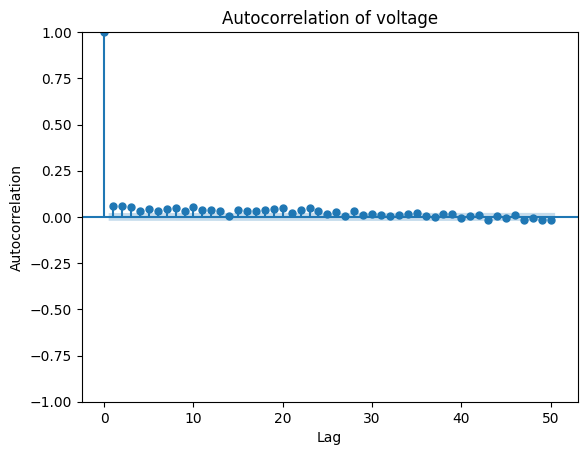

<Figure size 600x400 with 0 Axes>

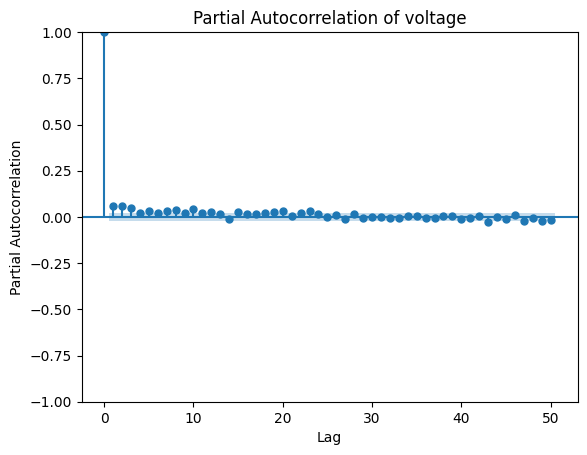

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming you have loaded your telemetry data into a DataFrame named 'telemetry_data'

# Convert the 'datetime' column to datetime format if it's not already
mach1['datetime'] = pd.to_datetime(mach1['datetime'])

# Set the 'datetime' column as the index
mach1.set_index('datetime', inplace=True)

# Plot autocorrelation
plt.figure(figsize=(6,4))
plot_acf(mach1['volt'], lags=50, title='Autocorrelation of voltage')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot partial autocorrelation
plt.figure(figsize=(6,4))
plot_pacf(mach1['volt'], lags=50, title='Partial Autocorrelation of voltage')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

<ipython-input-80-e200ffe24180>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1200x500 with 0 Axes>

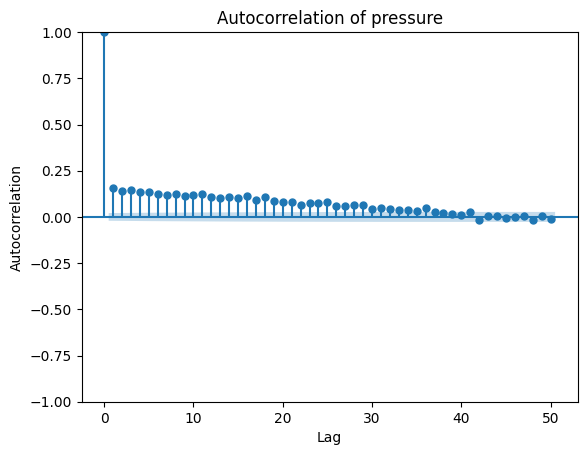

<Figure size 1200x500 with 0 Axes>

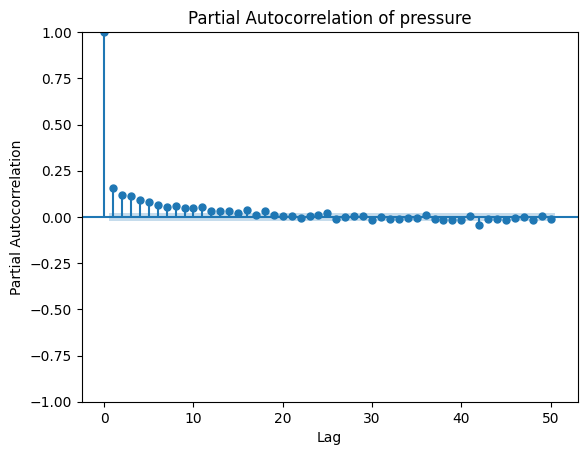

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming you have loaded your telemetry data into a DataFrame named 'telemetry_data'

# Convert the 'datetime' column to datetime format if it's not already
mach1['datetime'] = pd.to_datetime(mach1['datetime'])

# Set the 'datetime' column as the index
mach1.set_index('datetime', inplace=True)

# Plot autocorrelation
plt.figure(figsize=(12, 5))
plot_acf(mach1['pressure'], lags=50, title='Autocorrelation of pressure')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot partial autocorrelation
plt.figure(figsize=(12, 5))
plot_pacf(mach1['pressure'], lags=50, title='Partial Autocorrelation of pressure')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()


Text(0, 0.5, 'vibration')

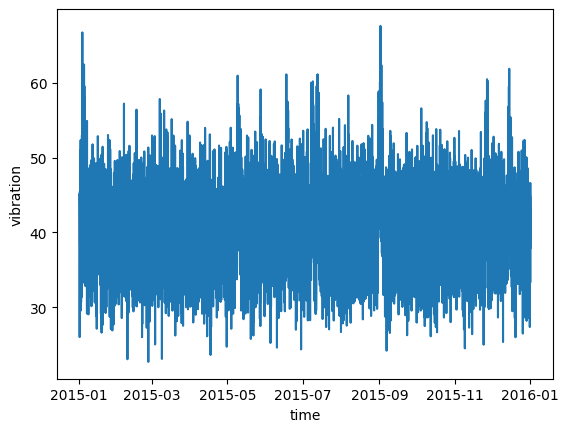

In [ ]:
vibration = mach1['vibration']
plt.plot(mach1.index , vibration)
plt.xlabel('time')
plt.ylabel('vibration')

<ipython-input-87-38dfffd9f084>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1200x500 with 0 Axes>

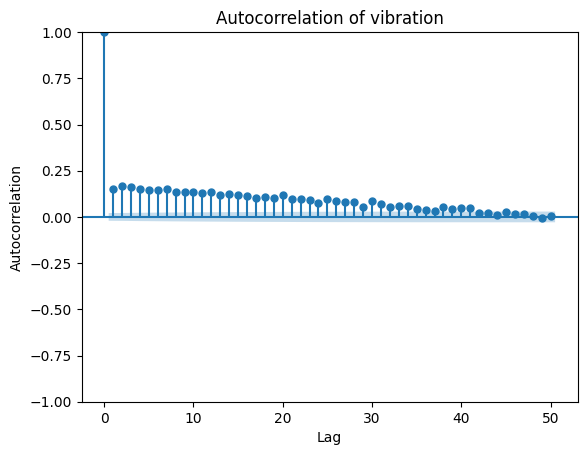

<Figure size 1200x500 with 0 Axes>

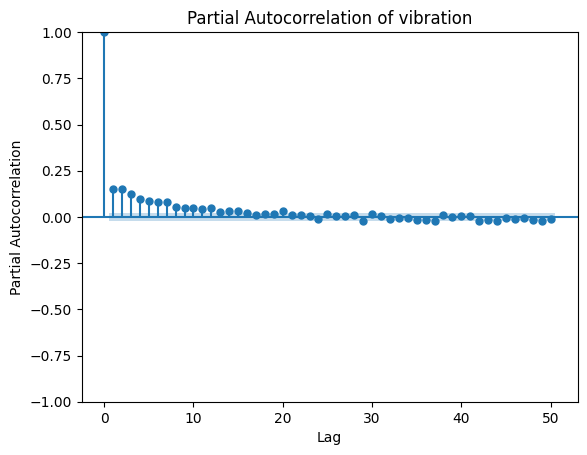

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming you have loaded your telemetry data into a DataFrame named 'telemetry_data'

# Convert the 'datetime' column to datetime format if it's not already
mach1['datetime'] = pd.to_datetime(mach1['datetime'])

# Set the 'datetime' column as the index
mach1.set_index('datetime', inplace=True)

# Plot autocorrelation
plt.figure(figsize=(12, 5))
plot_acf(mach1['vibration'], lags=50, title='Autocorrelation of vibration')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot partial autocorrelation
plt.figure(figsize=(12, 5))
plot_pacf(mach1['vibration'], lags=50, title='Partial Autocorrelation of vibration')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [ ]:
from scipy.fftpack import fft

In [ ]:
from scipy.fft import fft, ifft, fftshift, ifftshift

Text(0, 0.5, 'FFT Amplitude |X(freq)|')

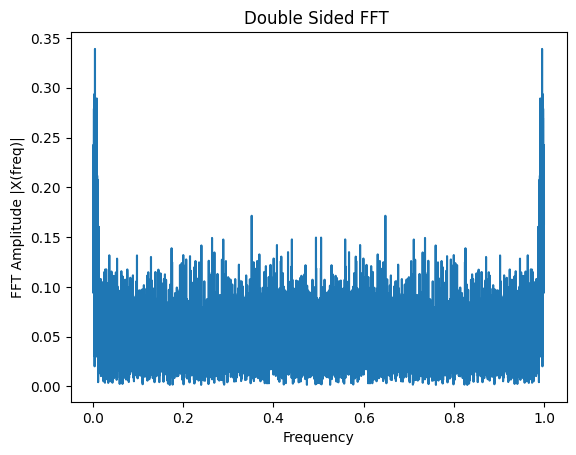

In [ ]:
# FFT and Amplitude Spectrum
Fs = 1 # sampling frequency, our unit of measure is "months" (Important!)
X = fft(vibration.values)
N = len(X)
freq_step = Fs/N;
freq_vec = np.arange(0,Fs,freq_step)

ampl = np.abs(X[1:])/N # Start from 1 to remove the zero frequency component, called DC
freq_vec = freq_vec[1:]
plt.plot(freq_vec,ampl)
plt.title('Double Sided FFT ')
plt.xlabel('Frequency')
plt.ylabel('FFT Amplitude |X(freq)|')

In [ ]:
from scipy import stats,signal

Frequency for the maximum value is:  0.004337404405889739
Period (months/cycle):  230.55263157894734


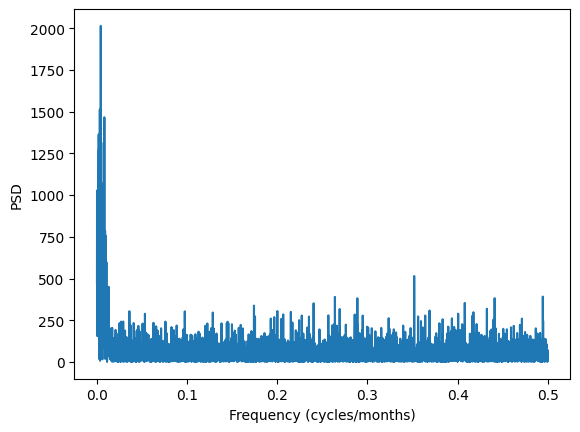

In [ ]:
# PSD using the raw periodogram
f_per, Pxx_per = signal.periodogram(vibration,Fs,detrend=False,window='boxcar',return_onesided=True,scaling='density')
f_per = f_per[1:]
Pxx_per = Pxx_per[1:]

plt.plot(f_per, Pxx_per)
plt.xlabel('Frequency (cycles/months)')
plt.ylabel('PSD');
temp = np.where(Pxx_per == Pxx_per.max())
print('Frequency for the maximum value is: ',float(f_per[temp]))
print('Period (months/cycle): ',float(1/f_per[temp]))

Frequency for the maximum value (Welch) is:  0.004337404405889739
Frequency for the maximum value (Periodogram) is:  0.004337404405889739


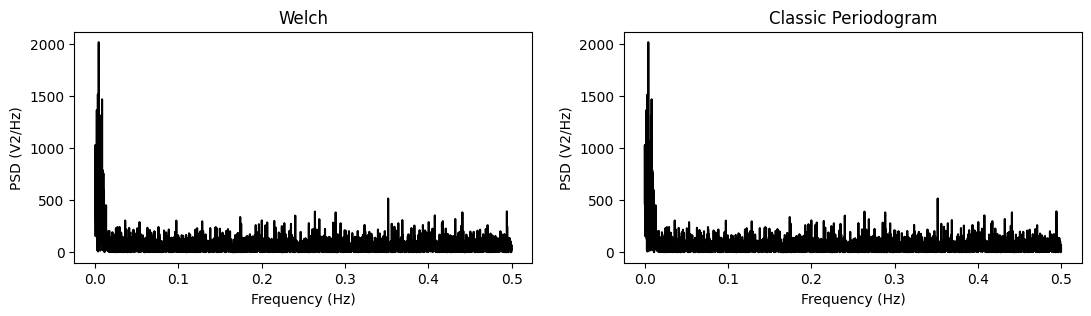

In [ ]:

win = len(vibration)# try different values
f_welch_density, Pxx_welch_density = signal.welch(vibration,Fs, window='boxcar', nperseg=win, return_onesided=True, scaling='density')
f_welch_density = f_welch_density[1:]
Pxx_welch_density = Pxx_welch_density[1:]

f_per_density, Pxx_per_density = signal.periodogram(vibration,Fs,detrend=False,window='boxcar',nfft=None,return_onesided=True,scaling='density')
f_per_density = f_per_density[1:]
Pxx_per_density = Pxx_per_density[1:]

fig, ax = plt.subplots(1, 2, figsize=(13, 3))
ax[0].plot(f_welch_density, Pxx_welch_density,'k')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('PSD (V2/Hz)');
ax[0].set_title('Welch')

ax[1].plot(f_per_density, Pxx_per_density,'k')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('PSD (V2/Hz)');
ax[1].set_title('Classic Periodogram')

temp_welch = np.where(Pxx_welch_density == Pxx_welch_density.max())
print('Frequency for the maximum value (Welch) is: ',float(f_welch_density[temp_welch]))

temp_per = np.where(Pxx_per_density == Pxx_per_density.max())
print('Frequency for the maximum value (Periodogram) is: ',float(f_per_density[temp_per]))

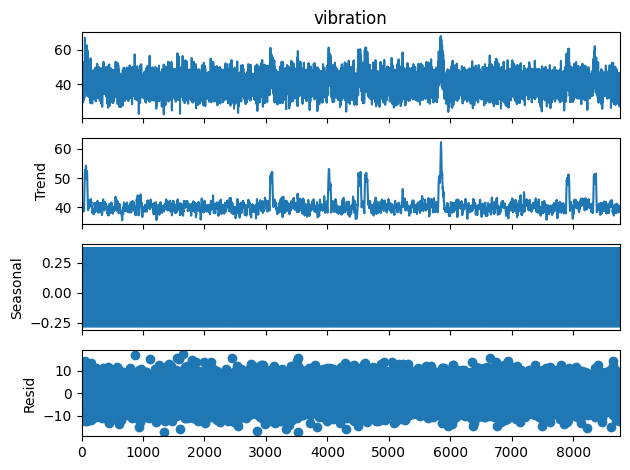

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Apply an additive decomposition and visualise all the components.
decompose_data_add = seasonal_decompose(vibration, model='additive', period = 12) # period was automatically set to 12, considering the monthly data
decompose_data_add.plot()
plt.show()


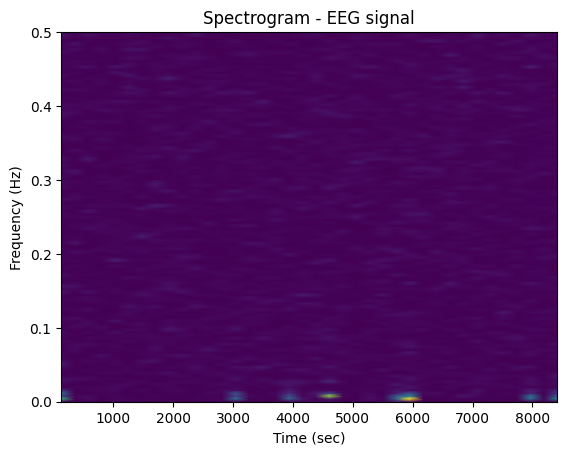

In [ ]:
# Visualise Spectrogram
#plt.style.use('default')
freq, time, Sxx = signal.spectrogram(vibration, Fs, return_onesided=True)
plt.pcolormesh(time, freq, Sxx,shading='gouraud')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)');
plt.title('Spectrogram - EEG signal');

In [ ]:
# ADF
from statsmodels.tsa.stattools import adfuller
def adfuller_test(data):
  adf_test = adfuller(data,autolag='AIC') # AIC is the default option
  print('ADF Statistic:', adf_test[0])
  print('p-value: ', adf_test[1])
  print('Critical Values:')
  for key, value in adf_test[4].items():
      print('\t%s: %.3f' % (key, value))
  if adf_test[1] <= 0.05:
    print('We can reject the null hypothesis (H0) --> data is stationary')
  else:
    print('We cannot reject the null hypothesis (H0) --> data is non-stationary')


print('ADF on rotate')
adfuller_test(vibration)

# p > 0.05 --> We cannot reject the null hypothesis (H0), meaning data the data has a unit root and is non-stationary.
# p <= 0.05 --> We reject the null hypothesis (H0), meaning data the data has not a unit root and is stationary.

ADF on rotate
ADF Statistic: -12.110188292454154
p-value:  1.9273485565358697e-22
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
We can reject the null hypothesis (H0) --> data is stationary


In [ ]:
# KPSS
from statsmodels.tsa.stattools import kpss

def kpss_test(data):
  kpss_out = kpss(data,regression='c', nlags='auto', store=True)
  print('KPSS Statistic:', kpss_out[0])
  print('p-value: ', kpss_out[1])
  if kpss_out[1] <= 0.05:
    print('We can reject the null hypothesis (H0) --> data is not trend stationary')
  else:
    print('We cannot reject the null hypothesis (H0) --> data is trend stationary')


print('KPSS on rotate')
kpss_test(vibration)

KPSS on rotate
KPSS Statistic: 0.17993731349810055
p-value:  0.1
We cannot reject the null hypothesis (H0) --> data is trend stationary


In [ ]:
from pmdarima import auto_arima

def find_best_arima_parameters(train_data, max_p=5, max_d=2, max_q=5, seasonal=False):
    """
    Find the best suitable values for p, d, and q for an ARIMA model.

    Parameters:
    - train_data: A pandas Series or 1D array containing the training time series data.
    - max_p: The maximum value of p to search for.
    - max_d: The maximum value of d to search for.
    - max_q: The maximum value of q to search for.
    - seasonal: If True, search for seasonal ARIMA parameters as well.

    Returns:
    - A tuple (p, d, q) representing the best ARIMA parameters.
    """
    arima_model = auto_arima(train_data,
                            max_p=max_p,
                            max_d=max_d,
                            max_q=max_q,
                            seasonal=seasonal,
                            stepwise=True,
                            suppress_warnings=True,
                            error_action="ignore")
    return arima_model.order

best_p, best_d, best_q = find_best_arima_parameters(vibration)
print("Best ARIMA Parameters (p, d, q):", best_p, best_d, best_q)

Best ARIMA Parameters (p, d, q): 1 0 1


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(vibration, order=(best_p, best_d, best_q))
model_fit = model.fit()
print(model_fit)
result = model_fit.forecast(steps=5)
result

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



2016-01-01 07:00:00    40.467185
2016-01-01 08:00:00    40.470510
2016-01-01 09:00:00    40.473740
2016-01-01 10:00:00    40.476877
2016-01-01 11:00:00    40.479925
Freq: H, Name: predicted_mean, dtype: float64

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn
from scipy import stats,signal
from sklearn.linear_model import LinearRegression
from datetime import datetime
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.stattools import durbin_watson
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Ljung-Box Q-Test --> Check for the presence of autocorrelation
LB_AR2 = acorr_ljungbox(model_fit.resid, lags=[10], return_df=True) # [] to consider a single lag, otherwise it will return the values for all the lags up to that number
print('LB p-value for residuals', float(LB_AR2['lb_pvalue']))
print('----------------------------')

# Durbin-Watson Test --> Check for the presence of autocorrelation
dw_google = durbin_watson(model_fit.resid)
print('DW statistic for residuals:', dw_google)
print('----------------------------')

# Jarque-Bera Test --> Check if the sample data has the skewness and kurtosis matching a normal distribution.
jb_statistic = stats.jarque_bera(model_fit.resid)
print('JB p-value for residuals:', jb_statistic.pvalue)

LB p-value for residuals 0.8320323278077044
----------------------------
DW statistic for residuals: 2.0398819764409817
----------------------------
JB p-value for residuals: 0.34342227090072447


Predicted value for Auto Regression  2015-12-01 01:00:00    38.032101
2015-12-01 02:00:00    38.509896
2015-12-01 03:00:00    38.602581
2015-12-01 04:00:00    39.365528
2015-12-01 05:00:00    39.529109
                         ...    
2016-01-30 21:00:00    40.583427
2016-01-30 22:00:00    40.583427
2016-01-30 23:00:00    40.583427
2016-01-31 00:00:00    40.583427
2016-01-31 01:00:00    40.583427
Freq: H, Name: predicted_mean, Length: 1465, dtype: float64


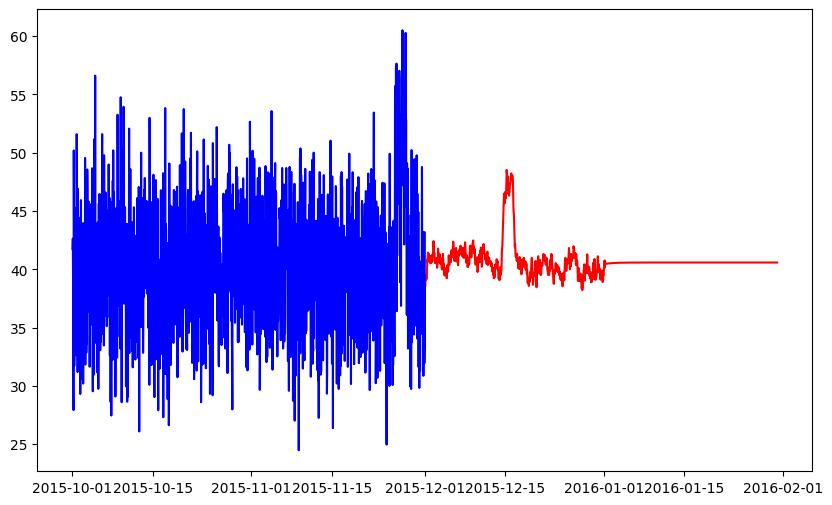

In [ ]:

#predict 2 month
y_predict = model_fit.predict( start= '2015-12-01 01:00:00', end = '2016-01-31 01:00:00' )
print('Predicted value for Auto Regression ', y_predict)
plt.figure(figsize=(10,6))
plt.plot(y_predict,c='r',)

# Display 2 previous month
plt.plot(vibration.loc['2015-10-01 01:00:00':'2015-12-01 01:00:00'],c='b',)
plt.show()

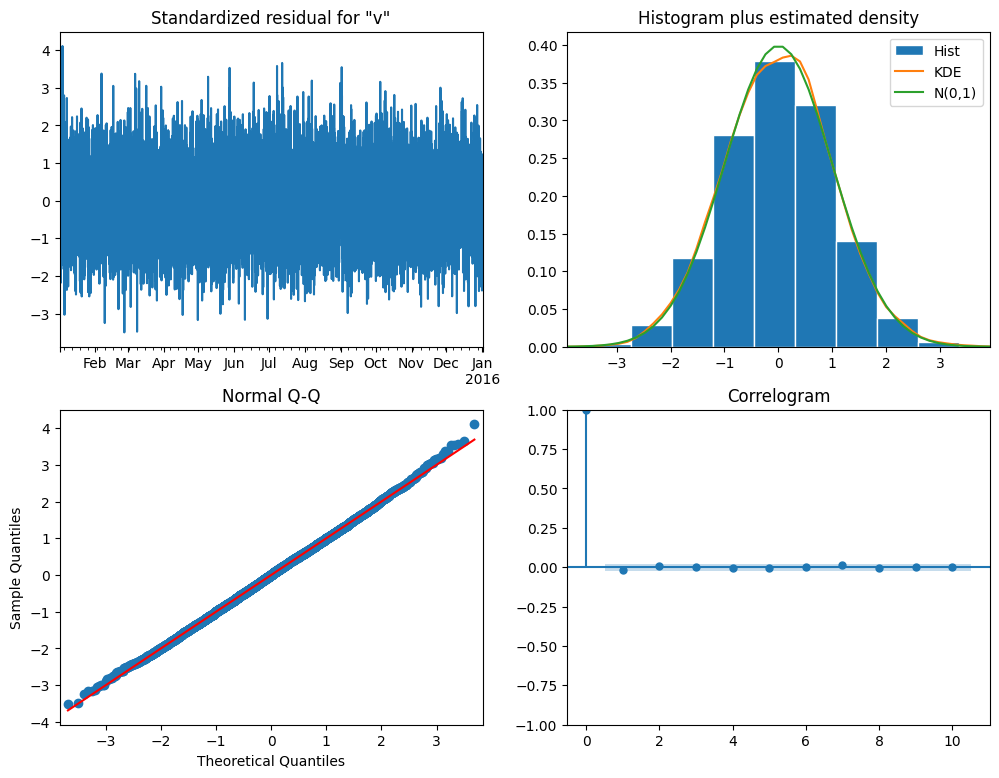

In [ ]:
# To automatically visualise different information related to the residuals
model_fit.plot_diagnostics(figsize=(12,9));

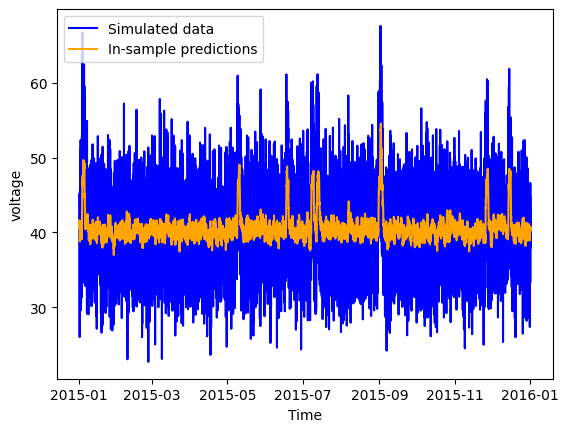

In [ ]:
# Plot data with in-sample predictions from ARIMA(2,0,0) model
plt.plot(vibration, color='blue',label='Simulated data')
plt.plot(model_fit.fittedvalues, color='orange', label='In-sample predictions')
plt.xlabel('Time')
plt.ylabel('voltage')
plt.legend();

# **Statistical Models**

In [ ]:
telemetry['datetime']=pd.to_datetime(telemetry['datetime'])

# set datatime column as index for the time series
telemetry.set_index('datetime',inplace=True)
telemetry.head()

machineID        volt      rotate    pressure  vibration
datetime                                                                     
2015-01-01 06:00:00          1  176.217853  418.504078  113.077935  45.087686
2015-01-01 07:00:00          1  162.879223  402.747490   95.460525  43.413973
2015-01-01 08:00:00          1  170.989902  527.349825   75.237905  34.178847
2015-01-01 09:00:00          1  162.462833  346.149335  109.248561  41.122144
2015-01-01 10:00:00          1  157.610021  435.376873  111.886648  25.990511

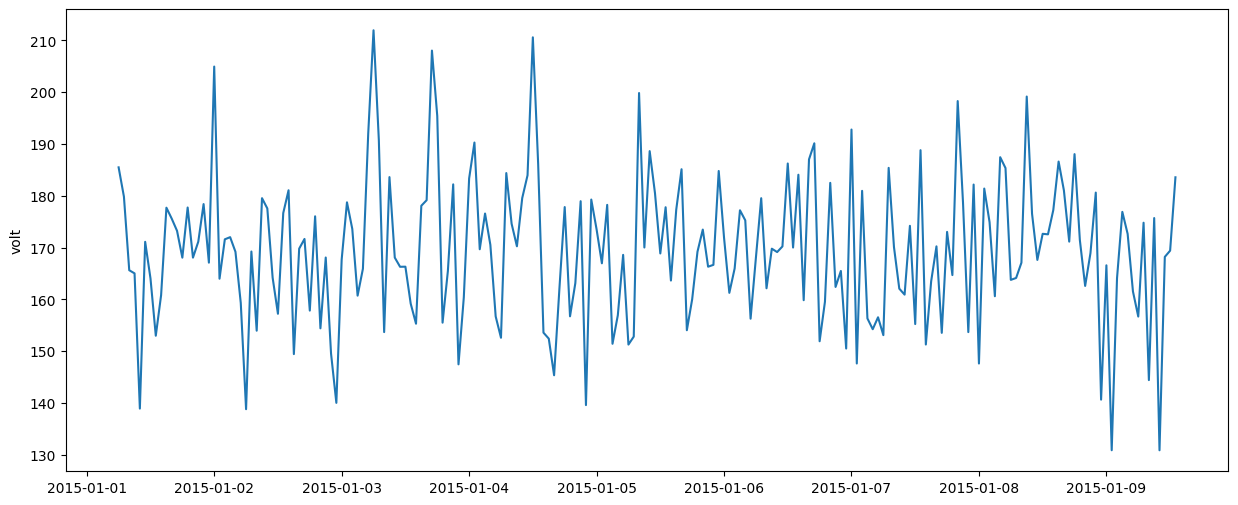

machineID        volt
datetime                                  
2015-01-01 06:00:00          3  185.482043
2015-01-01 07:00:00          3  179.818516
2015-01-01 08:00:00          3  165.616803
2015-01-01 09:00:00          3  165.007013
2015-01-01 10:00:00          3  138.898164

In [ ]:
df_volt=telemetry[['machineID','volt']]
df_volt_machine_3=df_volt[(df_volt['machineID']==3)]

#visualize first 200 recorded data
plt.figure(figsize=(15,6))
plt.plot(df_volt_machine_3['volt'].iloc[:200])
plt.ylabel('volt')
plt.show()

df_volt_machine_3.head()

In [ ]:
df_volt_machine_3['diff']=df_volt_machine_3['volt'].diff()
df_volt_machine_3.head()

<ipython-input-46-1c85913f8654>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_volt_machine_3['diff']=df_volt_machine_3['volt'].diff()


machineID        volt       diff
datetime                                             
2015-01-01 06:00:00          3  185.482043        NaN
2015-01-01 07:00:00          3  179.818516  -5.663527
2015-01-01 08:00:00          3  165.616803 -14.201714
2015-01-01 09:00:00          3  165.007013  -0.609790
2015-01-01 10:00:00          3  138.898164 -26.108849

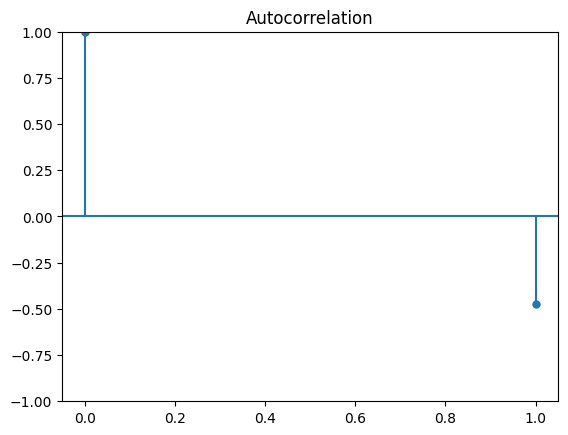

In [ ]:
# import autocorrelation function(plt_acf)
from  statsmodels.graphics.tsaplots import plot_acf as plt_acf

# Display autocorrelation of 1000 observations between the time series and its firts time lag(difference)
plt_acf(df_volt_machine_3['diff'].iloc[1:1000],lags=1)
plt.show()

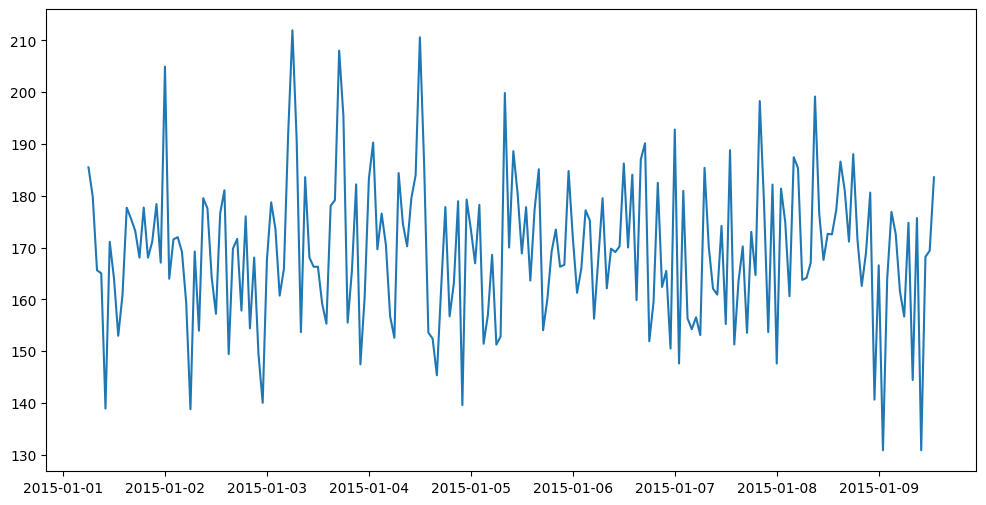

In [ ]:
df=df_volt_machine_3['volt']
plt.figure(figsize=(12,6))
plt.plot(df.iloc[:200])

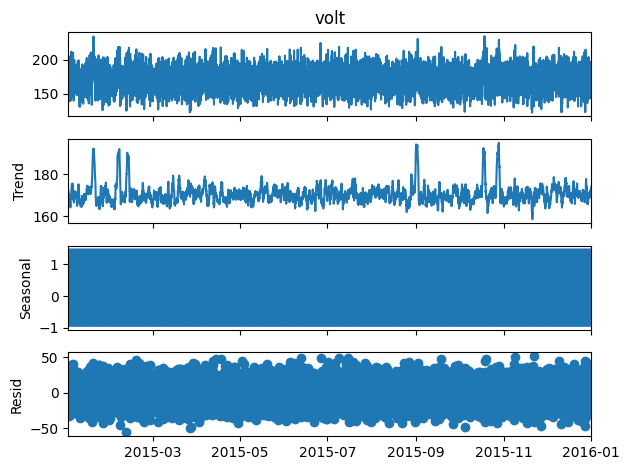

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
components = seasonal_decompose(df, model='additive',extrapolate_trend='freq')
components.plot()
plt.show()
# As observed from the seasonal component :No seasonality exists

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


Predicted value for Auto Regression  2015-12-01 01:00:00    172.785419
2015-12-01 02:00:00    170.751035
2015-12-01 03:00:00    172.677205
2015-12-01 04:00:00    170.185168
2015-12-01 05:00:00    169.911610
                          ...    
2016-01-30 21:00:00    170.657386
2016-01-30 22:00:00    170.657386
2016-01-30 23:00:00    170.657386
2016-01-31 00:00:00    170.657386
2016-01-31 01:00:00    170.657386
Freq: H, Length: 1465, dtype: float64


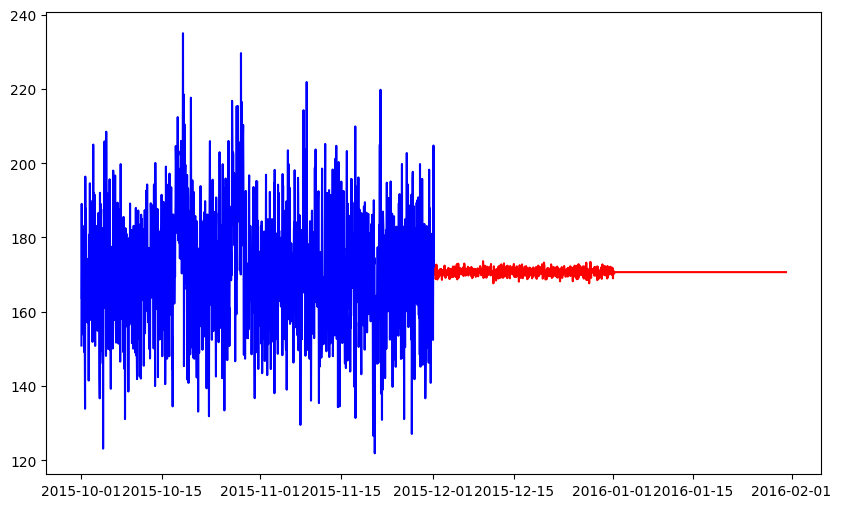

In [ ]:
# Note: Since the time series is staionary then d=0(number of differencing times)

from statsmodels.tsa.ar_model import AutoReg

# Define the model
model = AutoReg(lags=1,endog=df)
#fit the model
model_fit = model.fit()

#predict 2 month
y_predict = model_fit.predict( start= '2015-12-01 01:00:00', end = '2016-01-31 01:00:00' )
print('Predicted value for Auto Regression ', y_predict)
plt.figure(figsize=(10,6))
plt.plot(y_predict,c='r',)

# Display 2 previous month
plt.plot(df.loc['2015-10-01 01:00:00':'2015-12-01 01:00:00'],c='b',)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


Predicted value for ARIMA  2015-11-01 01:00:00    168.947338
2015-11-01 02:00:00    168.790971
2015-11-01 03:00:00    168.971922
2015-11-01 04:00:00    169.580849
2015-11-01 05:00:00    168.928867
                          ...    
2016-01-31 21:00:00    170.656638
2016-01-31 22:00:00    170.656638
2016-01-31 23:00:00    170.656638
2016-02-01 00:00:00    170.656638
2016-02-01 01:00:00    170.656638
Freq: H, Name: predicted_mean, Length: 2209, dtype: float64


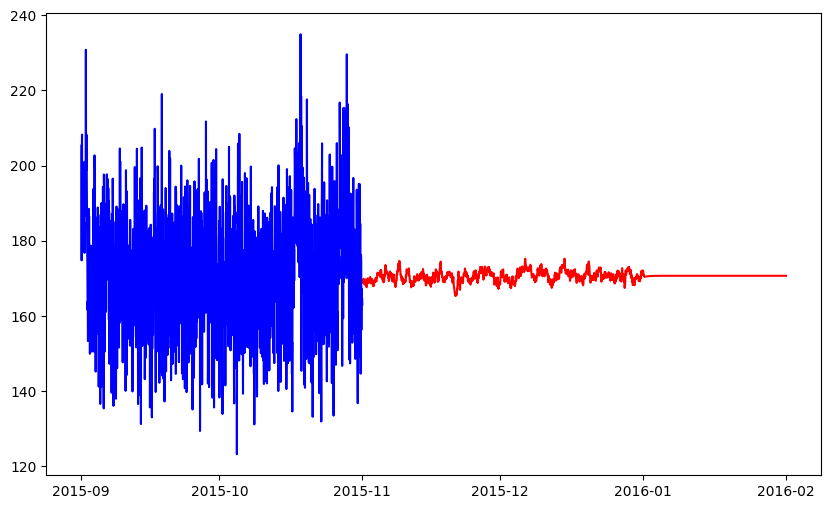

In [ ]:
# import ARIMA class
from statsmodels.tsa.arima.model import ARIMA
# Define ARIMA model p=1,d=0 q=1
model = ARIMA(df, order=(1,0,1))
model_fit = model.fit()
#=================================
# Predict 3 months
y_predict = model_fit.predict( start= '2015-11-01 01:00:00', end = '2016-02-01 01:00:00' )
print('Predicted value for ARIMA ', y_predict)
plt.figure(figsize=(10,6))
plt.plot(y_predict,c='r',)

# Disply 1 month before
plt.plot(df.loc['2015-9-01 01:00:00':'2015-11-01 01:00:00'],c='b',)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


Predicted value for SARIMAX  2015-11-01 01:00:00    169.802438
2015-11-01 02:00:00    169.575671
2015-11-01 03:00:00    169.637366
2015-11-01 04:00:00    170.079863
2015-11-01 05:00:00    169.459226
                          ...    
2016-01-31 21:00:00    169.736208
2016-01-31 22:00:00    169.735372
2016-01-31 23:00:00    169.734537
2016-02-01 00:00:00    169.733701
2016-02-01 01:00:00    169.732865
Freq: H, Name: predicted_mean, Length: 2209, dtype: float64


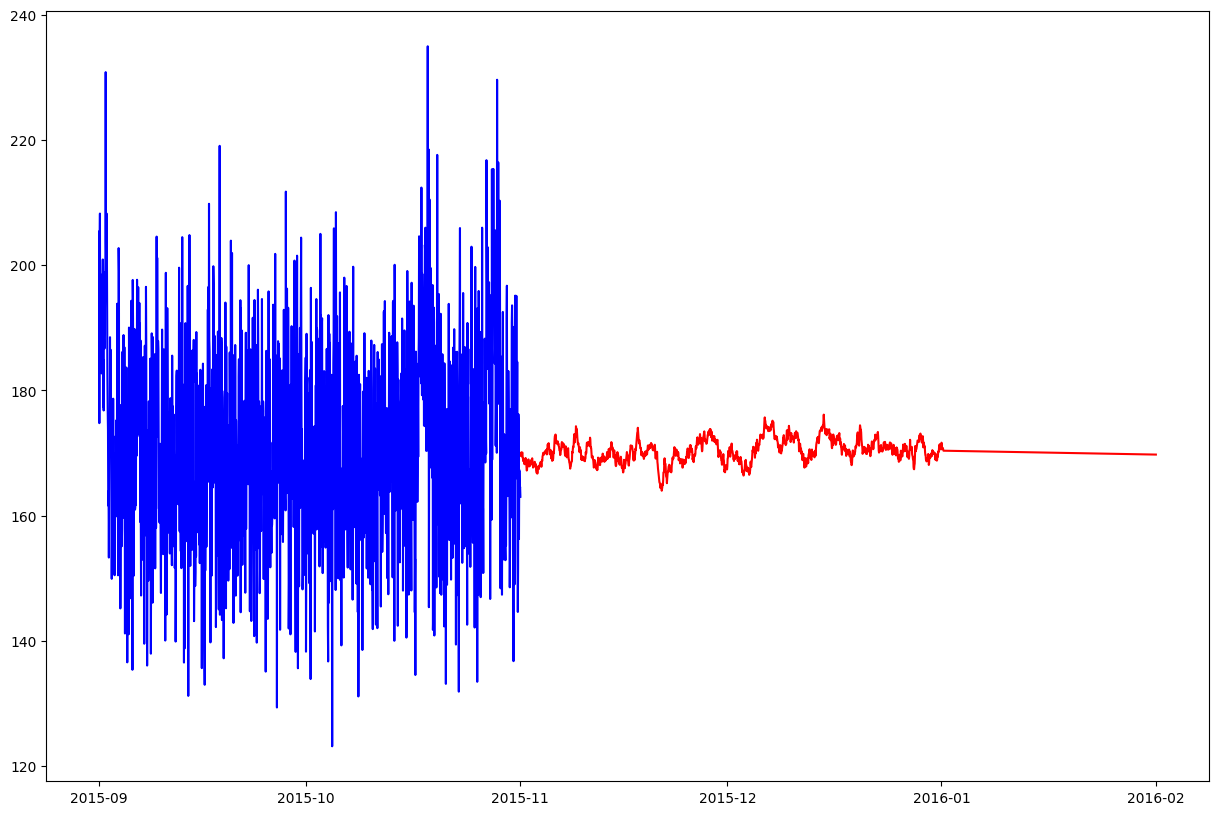

In [ ]:
# Since no stationarity then d=0 and also since no seasonality M=0 which means that It is SARIMAX model with no seasonality
# and no exogenous factors.we expect the result to be similar to ARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
#define model
model = SARIMAX(df, order=(1, 0, 1))
#fit model
model_fit = model.fit(disp=False)

#Predict 2 month
y_predict = model_fit.predict( start= '2015-11-01 01:00:00', end = '2016-02-01 01:00:00' )
print('Predicted value for SARIMAX ', y_predict)
plt.figure(figsize=(15,10))
plt.plot(y_predict,c='r',)

# Display 1 month before
plt.plot(df.loc['2015-9-01 01:00:00':'2015-11-01 01:00:00'],c='b',)
plt.show()

# **New Model**

In [ ]:
mach4 = final_output[final_output['machineID'] == 4]

In [ ]:
mach4.head()

machineID             datetime        volt      rotate    pressure  \
26283          4  2015-01-01 06:00:00  169.710847  463.646727   95.929877   
26284          4  2015-01-01 07:00:00  180.186857  538.763646   92.691920   
26285          4  2015-01-01 08:00:00  156.861991  413.804984   81.506614   
26286          4  2015-01-01 09:00:00  170.282492  416.303479   96.265308   
26287          4  2015-01-01 10:00:00  187.487332  464.110160  100.885645   

       vibration  error1  error2  error3  error4  error5  comp1_fail  \
26283  38.400372     0.0     0.0     0.0     0.0     0.0         0.0   
26284  44.826829     0.0     0.0     0.0     0.0     0.0         0.0   
26285  54.352090     0.0     0.0     0.0     0.0     0.0         0.0   
26286  37.613052     0.0     0.0     0.0     0.0     0.0         0.0   
26287  41.651371     0.0     0.0     0.0     0.0     0.0         0.0   

       comp2_fail  comp3_fail  comp4_fail  comp1_maint  comp2_maint  \
26283         0.0         0.0         0.0          0.0          0.0   
26284         0.0         0.0         0.0          0.0          0.0   
26285         0.0         0.0         0.0          0.0          0.0   
26286         0.0         0.0         0.0          0.0          0.0   
26287         0.0         0.0         0.0          0.0          0.0   

       comp3_maint  comp4_maint  age  
26283          0.0          0.0    7  
26284          0.0          0.0    7  
26285          0.0          0.0    7  
26286          0.0          0.0    7  
26287          0.0          0.0    7

<Figure size 600x400 with 0 Axes>

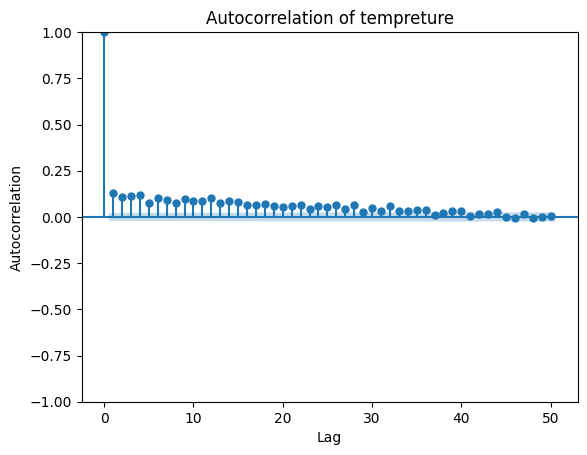

<Figure size 600x400 with 0 Axes>

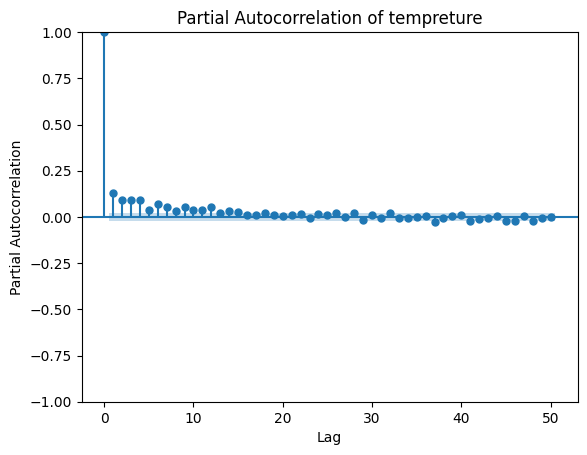

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming you have loaded your telemetry data into a DataFrame named 'telemetry_data'

# Convert the 'datetime' column to datetime format if it's not already
mach4['datetime'] = pd.to_datetime(mach4['datetime'])

# Set the 'datetime' column as the index
mach4.set_index('datetime', inplace=True)

# Plot autocorrelation
plt.figure(figsize=(6,4))
plot_acf(mach4['rotate'], lags=50, title='Autocorrelation of tempreture')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot partial autocorrelation
plt.figure(figsize=(6,4))
plot_pacf(mach4['rotate'], lags=50, title='Partial Autocorrelation of tempreture')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

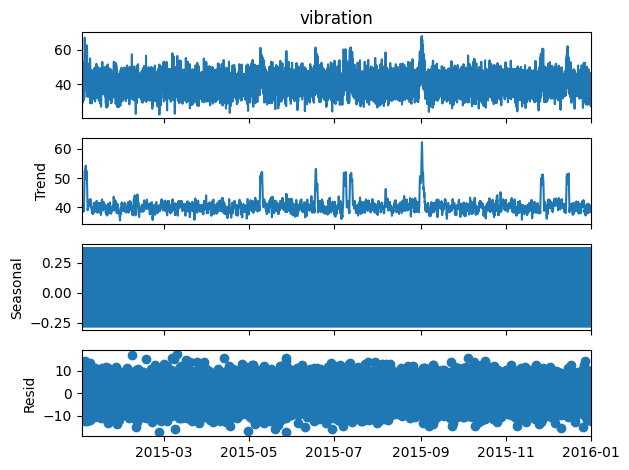

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Apply an additive decomposition and visualise all the components.
decompose_data_add = seasonal_decompose(vibration, model='additive', period = 12) # period was automatically set to 12, considering the monthly data
decompose_data_add.plot()
plt.show()


In [ ]:
rotate = mach4['rotate']

In [ ]:
# ADF
from statsmodels.tsa.stattools import adfuller
def adfuller_test(data):
  adf_test = adfuller(data,autolag='AIC') # AIC is the default option
  print('ADF Statistic:', adf_test[0])
  print('p-value: ', adf_test[1])
  print('Critical Values:')
  for key, value in adf_test[4].items():
      print('\t%s: %.3f' % (key, value))
  if adf_test[1] <= 0.05:
    print('We can reject the null hypothesis (H0) --> data is stationary')
  else:
    print('We cannot reject the null hypothesis (H0) --> data is non-stationary')


print('ADF on rotate')
adfuller_test(rotate)

# p > 0.05 --> We cannot reject the null hypothesis (H0), meaning data the data has a unit root and is non-stationary.
# p <= 0.05 --> We reject the null hypothesis (H0), meaning data the data has not a unit root and is stationary.

ADF on rotate
ADF Statistic: -14.588861952446603
p-value:  4.3471127317459204e-27
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
We can reject the null hypothesis (H0) --> data is stationary


In [ ]:
from pmdarima import auto_arima

def find_best_arima_parameters(train_data, max_p=5, max_d=2, max_q=5, seasonal=False):
    """
    Find the best suitable values for p, d, and q for an ARIMA model.

    Parameters:
    - train_data: A pandas Series or 1D array containing the training time series data.
    - max_p: The maximum value of p to search for.
    - max_d: The maximum value of d to search for.
    - max_q: The maximum value of q to search for.
    - seasonal: If True, search for seasonal ARIMA parameters as well.

    Returns:
    - A tuple (p, d, q) representing the best ARIMA parameters.
    """
    arima_model = auto_arima(train_data,
                            max_p=max_p,
                            max_d=max_d,
                            max_q=max_q,
                            seasonal=seasonal,
                            stepwise=True,
                            suppress_warnings=True,
                            error_action="ignore")
    return arima_model.order

best_p, best_d, best_q = find_best_arima_parameters(rotate)
print("Best ARIMA Parameters (p, d, q):", best_p, best_d, best_q)

Best ARIMA Parameters (p, d, q): 3 0 3


In [ ]:
model = ARIMA(rotate, order=(best_p, best_d, best_q))
model_fit = model.fit()
print(model_fit)
result = model_fit.forecast(steps=5)
result

2016-01-01 07:00:00    452.090236
2016-01-01 08:00:00    448.889679
2016-01-01 09:00:00    449.014290
2016-01-01 10:00:00    451.119477
2016-01-01 11:00:00    447.977912
Freq: H, Name: predicted_mean, dtype: float64

In [ ]:
# Ljung-Box Q-Test --> Check for the presence of autocorrelation
LB_AR2 = acorr_ljungbox(model_fit.resid, lags=[10], return_df=True) # [] to consider a single lag, otherwise it will return the values for all the lags up to that number
print('LB p-value for residuals', float(LB_AR2['lb_pvalue']))
print('----------------------------')

# Durbin-Watson Test --> Check for the presence of autocorrelation
dw_google = durbin_watson(model_fit.resid)
print('DW statistic for residuals:', dw_google)
print('----------------------------')

# Jarque-Bera Test --> Check if the sample data has the skewness and kurtosis matching a normal distribution.
jb_statistic = stats.jarque_bera(model_fit.resid)
print('JB p-value for residuals:', jb_statistic.pvalue)

LB p-value for residuals 0.9566155396203109
----------------------------
DW statistic for residuals: 2.0176826729824646
----------------------------
JB p-value for residuals: 0.09119552023396686


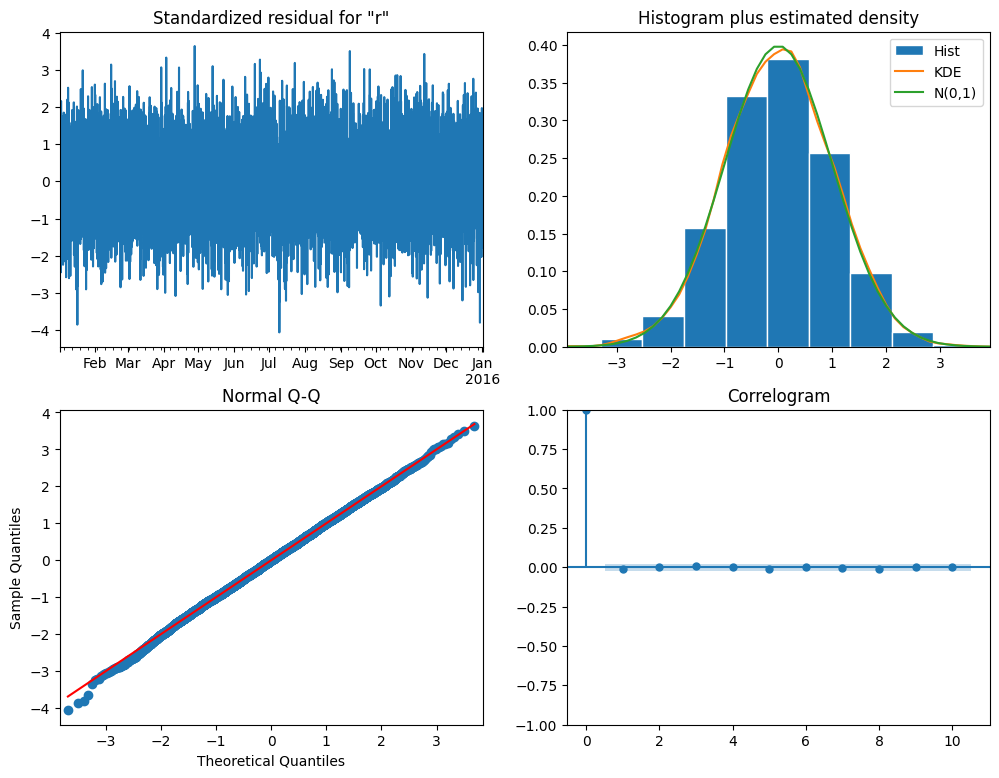

In [ ]:
# To automatically visualise different information related to the residuals
model_fit.plot_diagnostics(figsize=(12,9));

Predicted value for Auto Regression  2015-12-01 01:00:00    438.251161
2015-12-01 02:00:00    442.915503
2015-12-01 03:00:00    443.809415
2015-12-01 04:00:00    446.639430
2015-12-01 05:00:00    445.802556
                          ...    
2016-01-30 21:00:00    446.057302
2016-01-30 22:00:00    446.057302
2016-01-30 23:00:00    446.057302
2016-01-31 00:00:00    446.057302
2016-01-31 01:00:00    446.057302
Freq: H, Name: predicted_mean, Length: 1465, dtype: float64


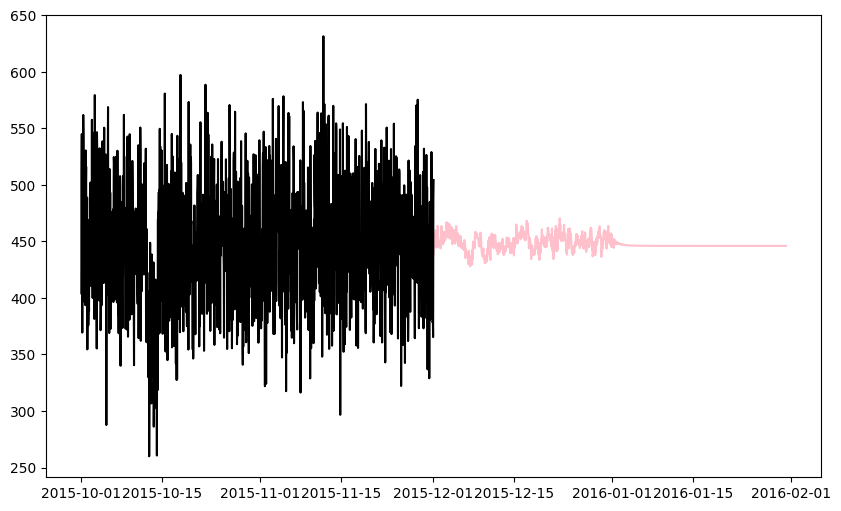

In [ ]:
#predict 2 month
y_predict = model_fit.predict( start= '2015-12-01 01:00:00', end = '2016-01-31 01:00:00' )
print('Predicted value for Auto Regression ', y_predict)
plt.figure(figsize=(10,6))
plt.plot(y_predict,c='pink',)

# Display 2 previous month
plt.plot(rotate.loc['2015-10-01 01:00:00':'2015-12-01 01:00:00'],c='black',)
plt.show()

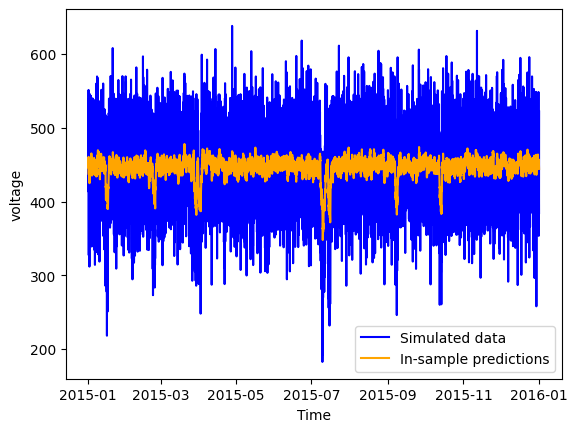

In [ ]:
# Plot data with in-sample predictions from ARIMA(2,0,0) model
plt.plot(rotate, color='blue',label='Simulated data')
plt.plot(model_fit.fittedvalues, color='orange', label='In-sample predictions')
plt.xlabel('Time')
plt.ylabel('voltage')
plt.legend();

# **Linear regression **

In [ ]:
mach5 = final_output[final_output['machineID'] == 5]

In [ ]:
mach5.head(2)

machineID             datetime        volt      rotate    pressure  \
35044          5  2015-01-01 06:00:00  165.082899  452.283576   84.591722   
35045          5  2015-01-01 07:00:00  192.783995  515.389673  119.082137   
35046          5  2015-01-01 08:00:00  159.702056  512.294013   90.212540   
35047          5  2015-01-01 09:00:00  162.706162  308.578855   95.072898   
35048          5  2015-01-01 10:00:00  166.158350  521.153678   76.874388   

       vibration  error1  error2  error3  error4  error5  comp1_fail  \
35044  40.298803     0.0     0.0     0.0     0.0     0.0         0.0   
35045  37.302359     0.0     0.0     0.0     0.0     0.0         0.0   
35046  44.295005     0.0     0.0     0.0     0.0     0.0         0.0   
35047  39.401406     0.0     0.0     0.0     0.0     0.0         0.0   
35048  41.023317     0.0     0.0     0.0     0.0     0.0         0.0   

       comp2_fail  comp3_fail  comp4_fail  comp1_maint  comp2_maint  \
35044         0.0         0.0         0.0          0.0          0.0   
35045         0.0         0.0         0.0          0.0          0.0   
35046         0.0         0.0         0.0          0.0          0.0   
35047         0.0         0.0         0.0          0.0          0.0   
35048         0.0         0.0         0.0          0.0          0.0   

       comp3_maint  comp4_maint  age  
35044          0.0          0.0    2  
35045          0.0          0.0    2  
35046          0.0          0.0    2  
35047          0.0          0.0    2  
35048          0.0          0.0    2

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mach5.drop(['machineID' , 'datetime', 'age'], axis=1, inplace=True )

In [ ]:
mach5.head(2)

volt      rotate    pressure  vibration  error1  error2  error3  \
35044  165.082899  452.283576   84.591722  40.298803     0.0     0.0     0.0   
35045  192.783995  515.389673  119.082137  37.302359     0.0     0.0     0.0   

       error4  error5  comp1_fail  comp2_fail  comp3_fail  comp4_fail  \
35044     0.0     0.0         0.0         0.0         0.0         0.0   
35045     0.0     0.0         0.0         0.0         0.0         0.0   

       comp1_maint  comp2_maint  comp3_maint  comp4_maint  
35044          0.0          0.0          0.0          0.0  
35045          0.0          0.0          0.0          0.0

In [ ]:
mach5['days'] = range(mach5.shape[0])
mach5['days'] = mach5['days']+1
mach5.head(5)

volt      rotate    pressure  vibration  error1  error2  error3  \
35044  165.082899  452.283576   84.591722  40.298803     0.0     0.0     0.0   
35045  192.783995  515.389673  119.082137  37.302359     0.0     0.0     0.0   
35046  159.702056  512.294013   90.212540  44.295005     0.0     0.0     0.0   
35047  162.706162  308.578855   95.072898  39.401406     0.0     0.0     0.0   
35048  166.158350  521.153678   76.874388  41.023317     0.0     0.0     0.0   

       error4  error5  comp1_fail  comp2_fail  comp3_fail  comp4_fail  \
35044     0.0     0.0         0.0         0.0         0.0         0.0   
35045     0.0     0.0         0.0         0.0         0.0         0.0   
35046     0.0     0.0         0.0         0.0         0.0         0.0   
35047     0.0     0.0         0.0         0.0         0.0         0.0   
35048     0.0     0.0         0.0         0.0         0.0         0.0   

       comp1_maint  comp2_maint  comp3_maint  comp4_maint  days  
35044          0.0          0.0          0.0          0.0     1  
35045          0.0          0.0          0.0          0.0     2  
35046          0.0          0.0          0.0          0.0     3  
35047          0.0          0.0          0.0          0.0     4  
35048          0.0          0.0          0.0          0.0     5

In [ ]:
x = mach5['pressure']
y = mach5['days']

In [ ]:
x

35044     84.591722
35045    119.082137
35046     90.212540
35047     95.072898
35048     76.874388
            ...    
43800    153.187090
43801    152.191926
43802    142.451849
43803    156.228631
43804    142.414273
Name: pressure, Length: 8761, dtype: float64

In [ ]:
X = np.array(x)
N = len(X)
X = X.reshape((N,1))

y = np.array(y)
N = len(y)
y = y.reshape(N,1)

print('X dimension',X.shape)
print('y dimension',y.shape)

X dimension (8761, 1)
y dimension (8761, 1)


In [ ]:
# Apply linear regression
reg = LinearRegression().fit(X, y)
slope = reg.coef_
intercept = reg.intercept_
print('Slope is:', float(slope))
print('Intercept is: ', float(intercept))

fitted_values = reg.predict(X)

Slope is: 19.673370739681875
Intercept is:  2392.6874060265063


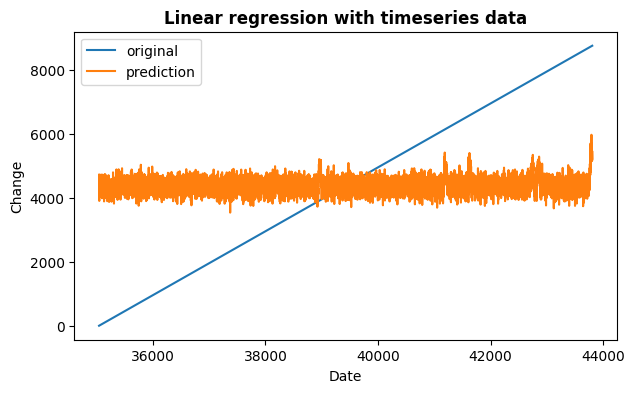

In [ ]:
# Visualize the results in a graph
plt.figure(figsize=(7, 4))
plt.plot(mach5['pressure'].index, y, label='original')
plt.plot(mach5['days'].index, fitted_values, label='prediction')
plt.xlabel('Date')
plt.ylabel('Change')
plt.title('Linear regression with timeseries data',weight='bold')
plt.legend(loc='best');

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     68.37
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           1.56e-16
Time:                        21:42:59   Log-Likelihood:                -81045.
No. Observations:                8761   AIC:                         1.621e+05
Df Residuals:                    8759   BIC:                         1.621e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2392.6874    241.974      9.888      0.0

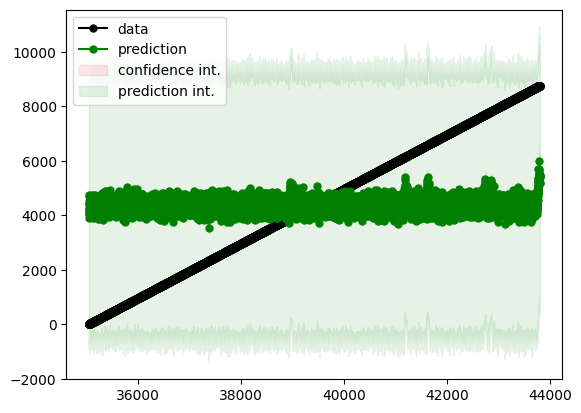

In [ ]:
# Linear regression directly with OLS() function
X = sm.add_constant(X)
results = sm.OLS(y,X).fit()
print(results.summary())
predictions = results.get_prediction(X) # default: X
df_predictions = predictions.summary_frame()

# Visualization with confidence intervals
plt.plot(mach5['pressure'].index, y, 'ko-',markersize =5, label='data')
plt.plot(mach5['days'].index, df_predictions['mean'],'go-',markersize =5,label='prediction')
plt.fill_between(mach5['pressure'].index, df_predictions.mean_ci_lower, df_predictions.mean_ci_upper, alpha=.1, color='crimson', label = 'confidence int.')
plt.fill_between(mach5['days'].index, df_predictions.obs_ci_lower, df_predictions.obs_ci_upper, alpha=.1, color='green',label='prediction int.')
plt.legend(loc='best');

# **IMPORTANT**

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn
from scipy import stats,signal
from sklearn.linear_model import LinearRegression
from datetime import datetime
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.stattools import durbin_watson
import warnings
warnings.filterwarnings("ignore")

In [ ]:
failures.head(2)

datetime  machineID failure
0  2015-01-05 06:00:00          1   comp4
1  2015-03-06 06:00:00          1   comp1

In [ ]:
fail1 = failures[failures['machineID'] == 1]

In [ ]:
fail1

datetime  machineID failure
0  2015-01-05 06:00:00          1   comp4
1  2015-03-06 06:00:00          1   comp1
2  2015-04-20 06:00:00          1   comp2
3  2015-06-19 06:00:00          1   comp4
4  2015-09-02 06:00:00          1   comp4
5  2015-10-17 06:00:00          1   comp2
6  2015-12-16 06:00:00          1   comp4

In [ ]:
fail1.shape

(7, 3)

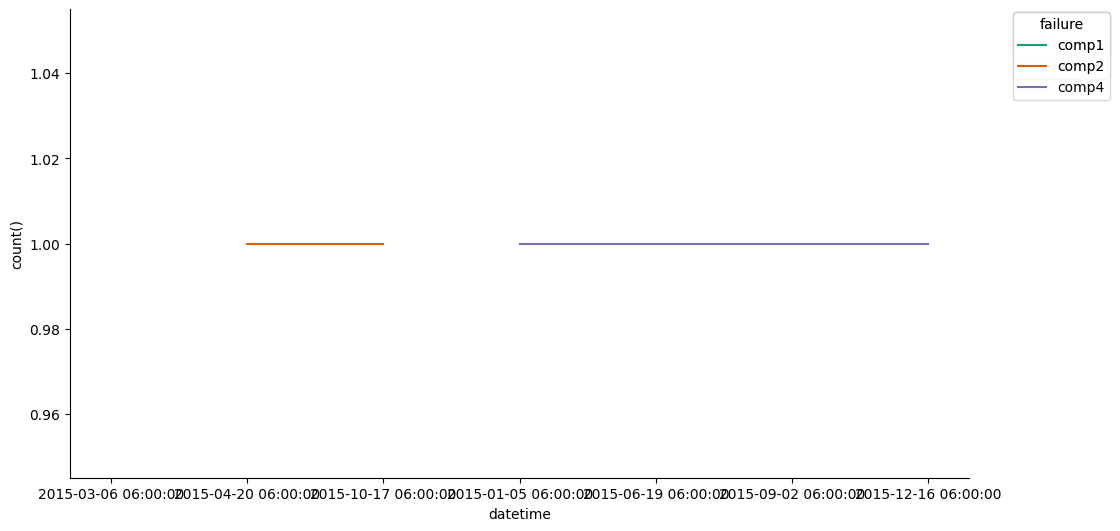

In [ ]:
# @title datetime vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['datetime']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'datetime'}, axis=1)
              .sort_values('datetime', ascending=True))
  xs = counted['datetime']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = fail1.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('failure')):
  _plot_series(series, series_name, i)
  fig.legend(title='failure', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('count()')

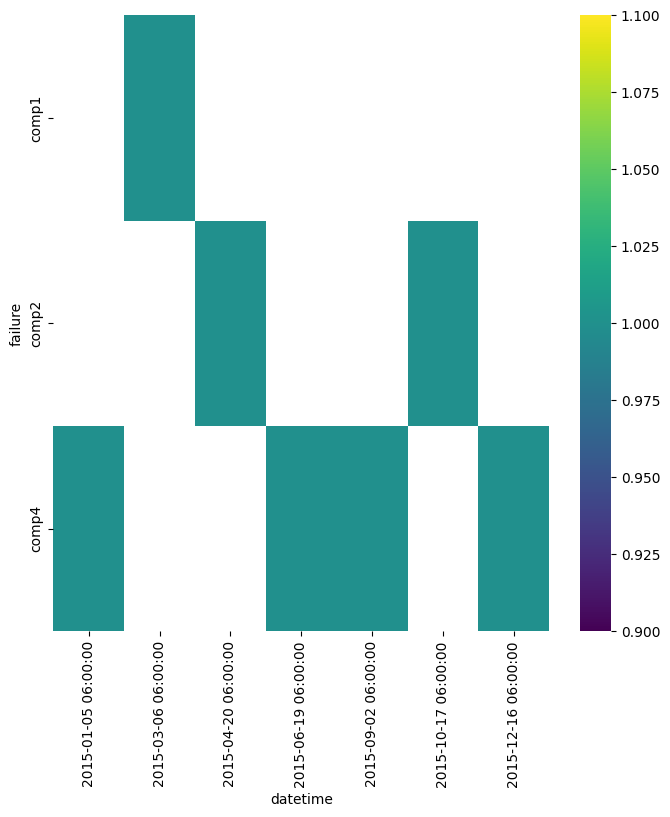

In [ ]:
# @title datetime vs failure

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['failure'].value_counts()
    for x_label, grp in fail1.groupby('datetime')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('datetime')
_ = plt.ylabel('failure')

In [ ]:
telemetry.head(2)

datetime  machineID        volt      rotate    pressure  \
0  2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1  2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   

   vibration  
0  45.087686  
1  43.413973

In [ ]:
tel1 =telemetry[ telemetry['machineID'] == 1]

In [ ]:
tel1

datetime  machineID        volt      rotate    pressure  \
0     2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1     2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2     2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3     2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4     2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   
...                   ...        ...         ...         ...         ...   
8756  2016-01-01 02:00:00          1  153.724780  450.254337   85.197443   
8757  2016-01-01 03:00:00          1  172.418099  375.701907   95.568265   
8758  2016-01-01 04:00:00          1  174.588145  460.505353   95.483913   
8759  2016-01-01 05:00:00          1  184.224228  438.823315  102.694358   
8760  2016-01-01 06:00:00          1  191.873171  382.736626  100.893691   

      vibration  
0     45.087686  
1     43.413973  
2     34.178847  
3     41.122144  
4     25.990511  
...         ...  
8756  43.698137  
8757  42.111661  
8758  33.293572  
8759  46.609515  
8760  37.940220  

[8761 rows x 6 columns]

In [ ]:
# select train data from failure data
time = pd.Timestamp('2015-04-20 06:00:00')

# Define start and end time for the time window
start_time = time - pd.Timedelta(days=10)
end_time = time + pd.Timedelta(days=10)

print("Start Time:", start_time)
print("End Time:", end_time)


Start Time: 2015-04-10 06:00:00
End Time: 2015-04-30 06:00:00


In [ ]:

start_time = pd.Timestamp(start_time)
end_time = pd.Timestamp(end_time)

tel1['datetime'] = pd.to_datetime(tel1['datetime'])

# Boolean indexing to select rows within the specified date range
selected_rows = tel1[(tel1['datetime'] >= start_time) & (tel1['datetime'] <= end_time)]

In [ ]:
selected_rows

datetime  machineID        volt      rotate    pressure  \
2376 2015-04-10 06:00:00          1  172.420973  541.764713   93.491830   
2377 2015-04-10 07:00:00          1  183.053284  475.655722  116.301882   
2378 2015-04-10 08:00:00          1  186.994709  479.392178   83.121373   
2379 2015-04-10 09:00:00          1  165.701589  463.721425   90.447989   
2380 2015-04-10 10:00:00          1  201.581877  522.867923   93.519428   
...                  ...        ...         ...         ...         ...   
2852 2015-04-30 02:00:00          1  174.020137  477.838969  104.696899   
2853 2015-04-30 03:00:00          1  175.760784  433.166348   89.358975   
2854 2015-04-30 04:00:00          1  142.592608  444.839973  112.284499   
2855 2015-04-30 05:00:00          1  155.303905  516.860165  116.174437   
2856 2015-04-30 06:00:00          1  160.139898  562.650553   91.210384   

      vibration  
2376  38.638065  
2377  38.545056  
2378  46.077218  
2379  36.803487  
2380  47.679945  
...         ...  
2852  47.259800  
2853  39.093877  
2854  40.232373  
2855  51.451063  
2856  37.006129  

[481 rows x 6 columns]

In [ ]:
selected_rows = selected_rows.drop(['machineID', 'rotate', 'pressure', 'vibration'], axis=1)

In [ ]:
selected_rows

datetime        volt
2376 2015-04-10 06:00:00  172.420973
2377 2015-04-10 07:00:00  183.053284
2378 2015-04-10 08:00:00  186.994709
2379 2015-04-10 09:00:00  165.701589
2380 2015-04-10 10:00:00  201.581877
...                  ...         ...
2852 2015-04-30 02:00:00  174.020137
2853 2015-04-30 03:00:00  175.760784
2854 2015-04-30 04:00:00  142.592608
2855 2015-04-30 05:00:00  155.303905
2856 2015-04-30 06:00:00  160.139898

[481 rows x 2 columns]

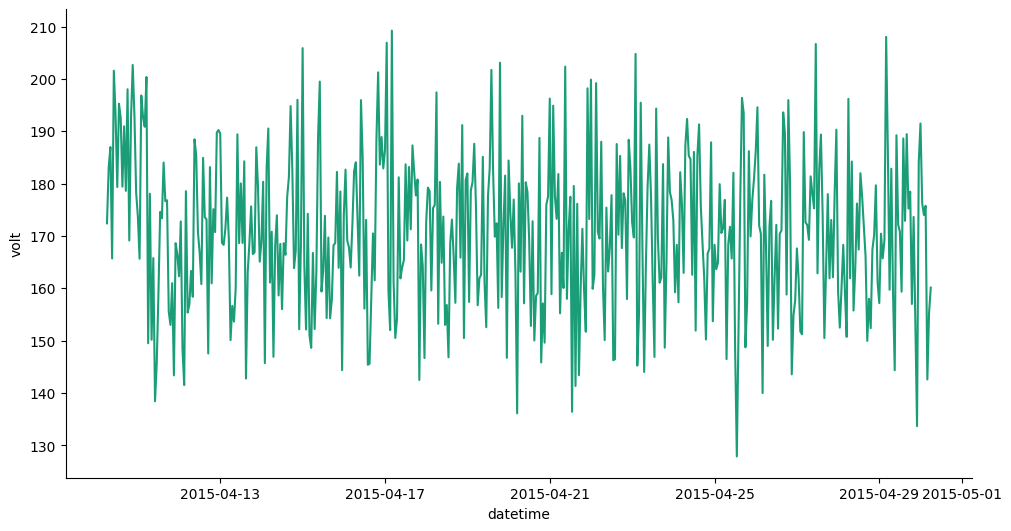

In [ ]:
# @title datetime vs volt

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['volt']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = selected_rows.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('volt')

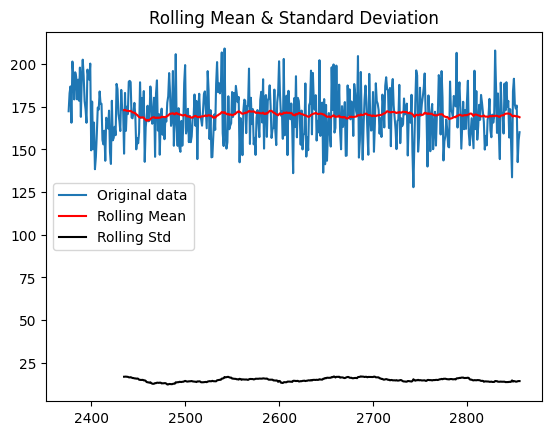

In [ ]:
series = selected_rows['volt']

# Rolling statistics
rolling_mean = series.rolling(60).mean()
rolling_std = series.rolling(60).std()
plt.plot(series, label='Original data')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation');

# Rolling mean and std have a constant behaviour over the years, indeed even if they change over the year this behaviour is then repeated next year.
# This hints towards stationarity

<Figure size 600x400 with 0 Axes>

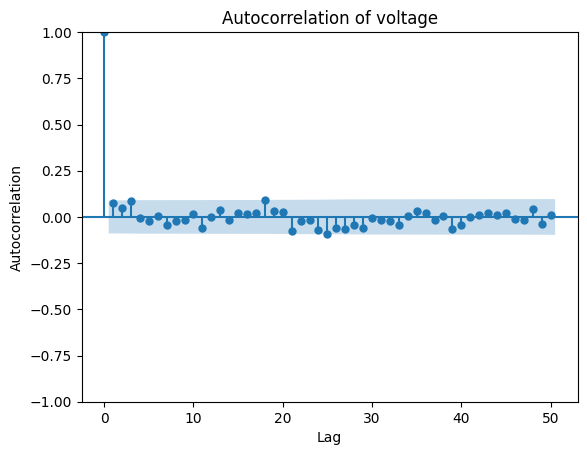

<Figure size 600x400 with 0 Axes>

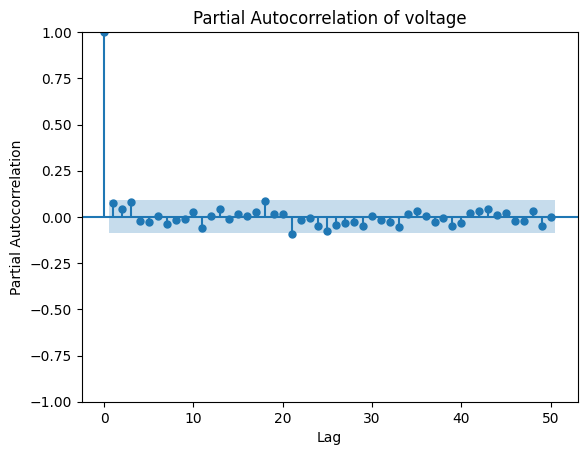

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming you have loaded your telemetry data into a DataFrame named 'telemetry_data'

# Convert the 'datetime' column to datetime format if it's not already
selected_rows['datetime'] = pd.to_datetime(selected_rows['datetime'])

# Set the 'datetime' column as the index
selected_rows.set_index('datetime', inplace=True)

# Plot autocorrelation
plt.figure(figsize=(6,4))
plot_acf(selected_rows['volt'], lags=50, title='Autocorrelation of voltage')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot partial autocorrelation
plt.figure(figsize=(6,4))
plot_pacf(selected_rows['volt'], lags=50, title='Partial Autocorrelation of voltage')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

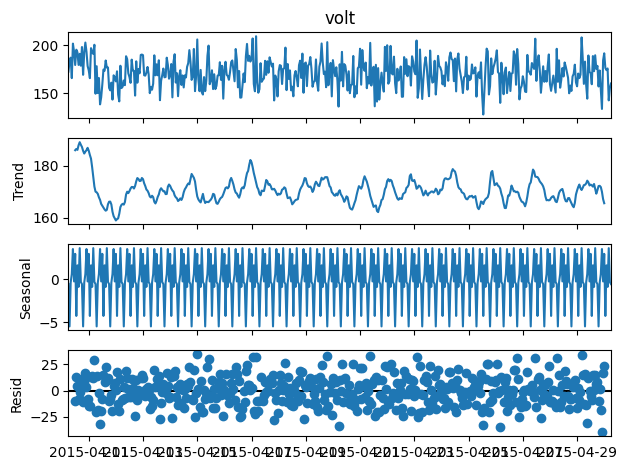

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Apply an additive decomposition and visualise all the components.
decompose_data_add = seasonal_decompose(selected_rows['volt'], model='additive', period = 12) # period was automatically set to 12, considering the monthly data
decompose_data_add.plot()
plt.show()


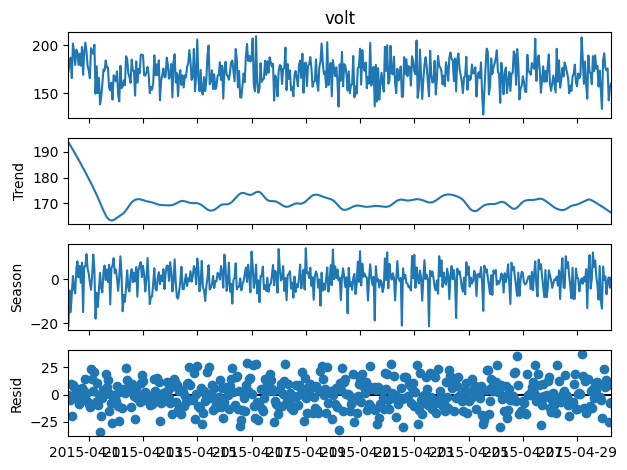

In [ ]:
# STL decomposition on previous data
from statsmodels.tsa.seasonal import STL

# default value for seasonal is 7 -> must be an odd number
stl = STL(selected_rows['volt'], seasonal=13) # robust = True to remove effects of outliers on the calculation of trend and seasonal component
res = stl.fit()
res.plot();

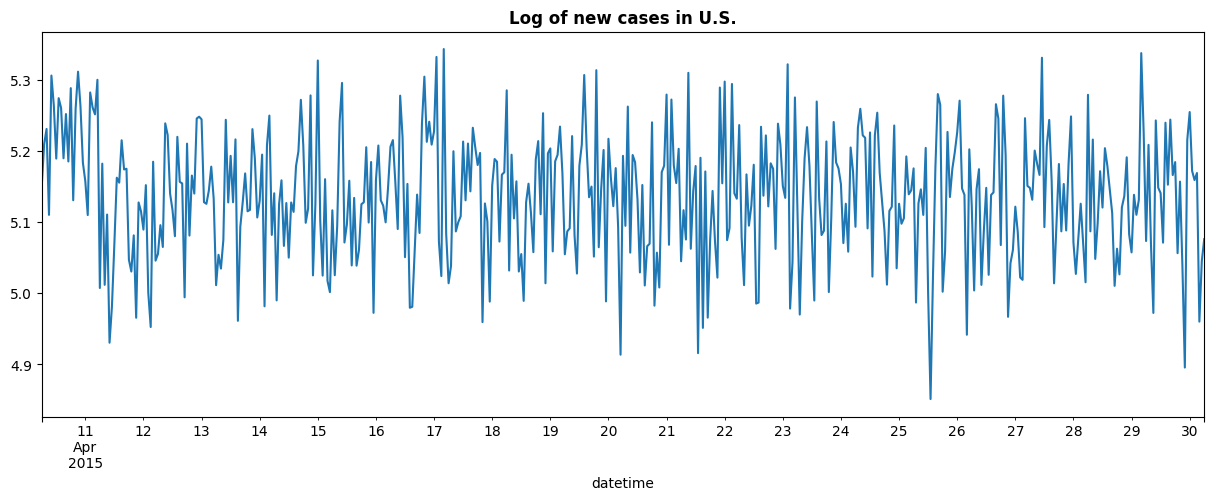

In [ ]:
# 3. Construct the log-transformed data
log_new_cases = np.log(selected_rows['volt'])

# Plot the transformed series
ax = log_new_cases.plot(figsize=(15, 5))
ax.set_title('Log of new cases in U.S.', fontsize='large', fontweight='bold');

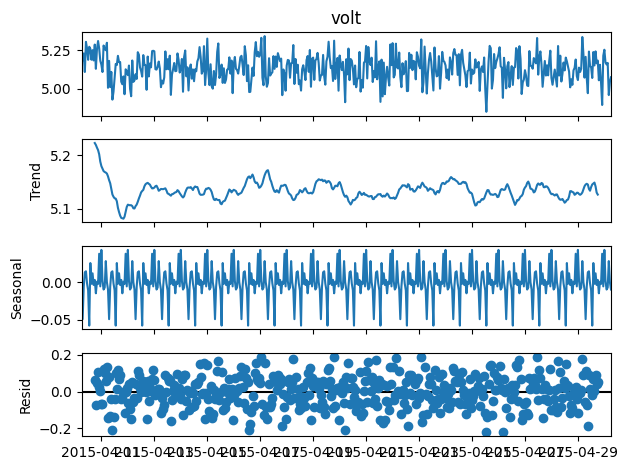

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 4. Perform classical seasonal decomposition
classical_res = seasonal_decompose(log_new_cases, model='additive')

# Visualise the results
classical_res.plot();

# Extract the trend and seasonal components
classical_trend = classical_res.trend
classical_seasonal = classical_res.seasonal

# Calculate the seasonally-adjusted series
classical_seasonally_adjusted = log_new_cases - classical_res.seasonal

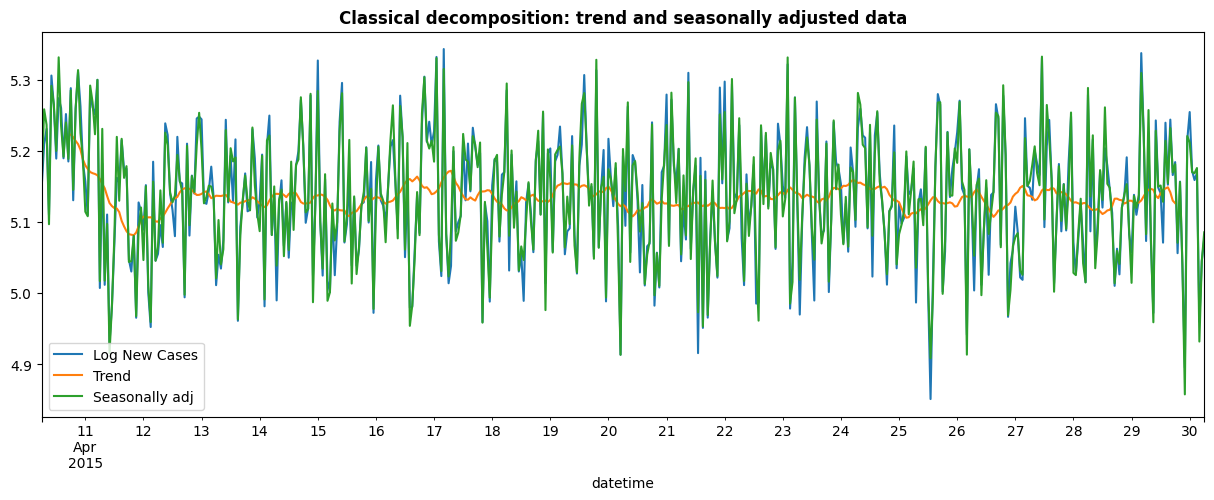

In [ ]:
# 5. Visualize the log-transformed new cases, trend component and seasonally-adjusted data
fig, ax = plt.subplots(figsize=(15, 5))

log_new_cases.plot()
classical_trend.plot()
classical_seasonally_adjusted.plot()
#stl_seasonally_adjusted.plot()
ax.set_title('Classical decomposition: trend and seasonally adjusted data', fontweight='bold');
ax.legend(['Log New Cases','Trend','Seasonally adj']);

In [ ]:
pip install numpy-stl

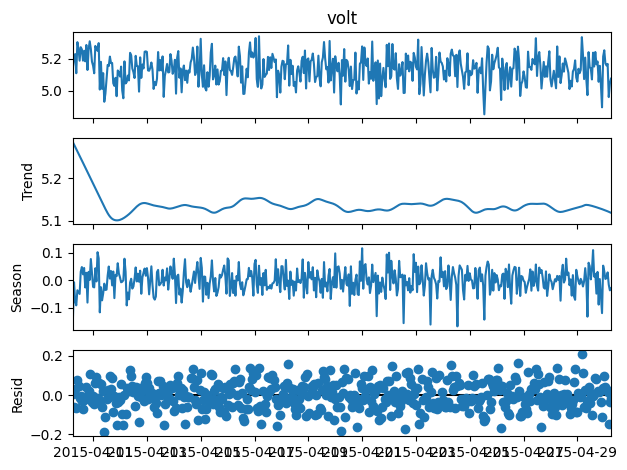

In [ ]:
# 6. Perform STL decomposition and visualise the results
from statsmodels.tsa.seasonal import STL
stl = STL(log_new_cases)
res = stl.fit()
res.plot();

# Extract the trend and seasonal components
stl_trend = res.trend
stl_seasonal = res.seasonal

# Calculate the seasonally-adjusted series
stl_seasonally_adjusted = log_new_cases - stl_seasonal

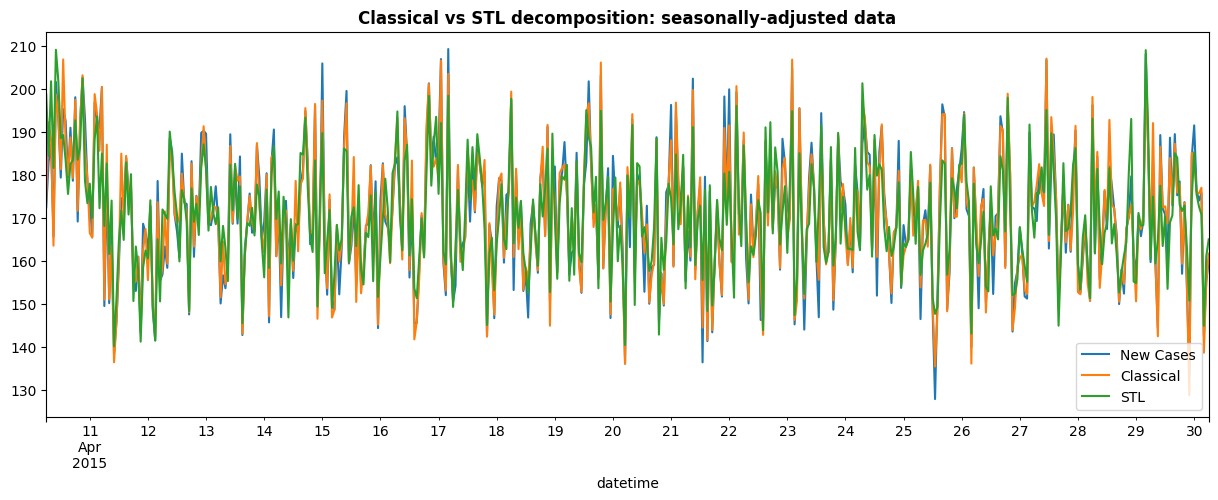

In [ ]:
# 7. Exp to reverse the log transformation. Visualise the new-cases data along with the seasonally-adjusted data derived with classical and STL decompositions
fig, ax = plt.subplots(figsize=(15, 5))

selected_rows['volt'].plot()
np.exp(classical_seasonally_adjusted).plot()
np.exp(stl_seasonally_adjusted).plot()
ax.set_title('Classical vs STL decomposition: seasonally-adjusted data', fontweight='bold');
ax.legend(['New Cases','Classical','STL']);


In [ ]:
# 8. Calculate the correlation between the two seasonally-adjusted time series
[c,p] = np.corrcoef(classical_seasonally_adjusted,stl_seasonally_adjusted)
print('Correlation is', c[0])

Correlation is 1.0


In [ ]:
# ADF
from statsmodels.tsa.stattools import adfuller
def adfuller_test(data):
  adf_test = adfuller(data,autolag='AIC') # AIC is the default option
  print('ADF Statistic:', adf_test[0])
  print('p-value: ', adf_test[1])
  print('Critical Values:')
  for key, value in adf_test[4].items():
      print('\t%s: %.3f' % (key, value))
  if adf_test[1] <= 0.05:
    print('We can reject the null hypothesis (H0) --> data is stationary')
  else:
    print('We cannot reject the null hypothesis (H0) --> data is non-stationary')


print('ADF on rotate')
adfuller_test(selected_rows['volt'])

# p > 0.05 --> We cannot reject the null hypothesis (H0), meaning data the data has a unit root and is non-stationary.
# p <= 0.05 --> We reject the null hypothesis (H0), meaning data the data has not a unit root and is stationary.

ADF on rotate
ADF Statistic: -20.212059521603145
p-value:  0.0
Critical Values:
	1%: -3.444
	5%: -2.868
	10%: -2.570
We can reject the null hypothesis (H0) --> data is stationary


In [ ]:
# KPSS
from statsmodels.tsa.stattools import kpss

def kpss_test(data):
  kpss_out = kpss(data,regression='c', nlags='auto', store=True)
  print('KPSS Statistic:', kpss_out[0])
  print('p-value: ', kpss_out[1])
  if kpss_out[1] <= 0.05:
    print('We can reject the null hypothesis (H0) --> data is not trend stationary')
  else:
    print('We cannot reject the null hypothesis (H0) --> data is trend stationary')


print('KPSS on rotate')
kpss_test(selected_rows['volt'])

KPSS on rotate
KPSS Statistic: 0.15049191817931026
p-value:  0.1
We cannot reject the null hypothesis (H0) --> data is trend stationary


In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.6 MB/s eta 0:00:00


In [ ]:
# Further possibility to choose the model parameters - Auto-ARIMA
from pmdarima.arima import auto_arima

arima_model =  auto_arima(selected_rows['volt'],start_p=0, d=0, start_q=0,
                          max_p=6, max_q=6, m=12, seasonal=True,
                          error_action='ignore',trace = True,
                          supress_warnings=True,stepwise = False,
                          random_state=20,information_criterion='aicc')
# m is the period for seasonal differencing

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AICC=3975.481, Time=0.09 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AICC=3977.503, Time=0.18 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AICC=3977.079, Time=1.26 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AICC=3977.509, Time=0.75 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AICC=3979.537, Time=1.03 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AICC=inf, Time=6.47 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AICC=3978.389, Time=6.55 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AICC=3979.010, Time=5.08 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AICC=inf, Time=7.89 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AICC=3974.805, Time=0.16 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AICC=3976.838, Time=0.59 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AICC=3976.867, Time=1.12 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AICC=3976.840, Time=0.76 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AICC=3978.881, Time=2.36 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AICC=inf, Time=7.36

In [ ]:
# Additional alternative: Grid search for finding the optimal parameters for the SARIMA model
import itertools

def sarima_parameter_search(search_range, seasonal, d, D): #  parameter combinations for a SARIMA model

    p = range(0, search_range)
    q = range(0, search_range)
    non_seasonal_pdq = list(itertools.product(p,d,q))
    P = p
    Q = q
    seasonal_pdq = [(x[0], x[1], x[2], x[3]) for x in list(itertools.product(P, D, Q, seasonal))]
    return non_seasonal_pdq, seasonal_pdq

non_seasonal_order, seasonal_order = sarima_parameter_search(4,[12],[1],[1])
print('Combinations for non-seasonal part:')
display(non_seasonal_order)

print('Combinations for seasonal part:')
display(seasonal_order)


Combinations for non-seasonal part:


[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

Combinations for seasonal part:


[(0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 1, 3, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (3, 1, 0, 12),
 (3, 1, 1, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12)]

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# This part is a bit computational intensive especially when the number of combinations is high (~20min), so let's skip running this part for the moment (but try this section)
combinations = len(seasonal_order) * len(non_seasonal_order)
df_season = pd.DataFrame([[0,0,0,0]], columns=['P','D','Q','S'])
df_noseason = pd.DataFrame([[0,0,0]], columns=['p','d','q'])
df_AICc = pd.DataFrame([[0]], columns=['AICc'])
idx = 1
for order_non_seas in non_seasonal_order:
    for order_seas in seasonal_order:
            model = SARIMAX(selected_rows['volt'],
                            order=order_non_seas,
                            seasonal_order=order_seas,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            result = model.fit()
            table_season = order_seas
            table_noseason = order_non_seas
            AICc = result.aicc
            df_season = df_season.append(pd.DataFrame([table_season], index = [idx], columns=['P','D','Q','S']))
            df_noseason = df_noseason.append(pd.DataFrame([table_noseason], index=[idx],columns=['p','d','q']))
            df_AICc = df_AICc.append(pd.DataFrame([AICc], index=[idx], columns=['AICc']))
            print('Combination #', idx, 'out of', combinations)
            idx +=1


# Search for the minimum AICc value and corresponding indexes
temp = df_AICc[1:].idxmin()
print(df_AICc.iloc[temp['AICc']]) # AICc =
print(df_noseason.iloc[temp['AICc']]) # p,d,q =
print(df_season.iloc[temp['AICc']]) # P,D,Q,S =

Combination # 1 out of 256
Combination # 2 out of 256
Combination # 3 out of 256
Combination # 4 out of 256
Combination # 5 out of 256
Combination # 6 out of 256
Combination # 7 out of 256
Combination # 8 out of 256
Combination # 9 out of 256
Combination # 10 out of 256
Combination # 11 out of 256
Combination # 12 out of 256
Combination # 13 out of 256
Combination # 14 out of 256
Combination # 15 out of 256
Combination # 16 out of 256
Combination # 17 out of 256
Combination # 18 out of 256
Combination # 19 out of 256
Combination # 20 out of 256
Combination # 21 out of 256
Combination # 22 out of 256
Combination # 23 out of 256
Combination # 24 out of 256
Combination # 25 out of 256
Combination # 26 out of 256
Combination # 27 out of 256
Combination # 28 out of 256
Combination # 29 out of 256
Combination # 30 out of 256
Combination # 31 out of 256
Combination # 32 out of 256
Combination # 33 out of 256
Combination # 34 out of 256
Combination # 35 out of 256
Combination # 36 out of 256
C

                                     SARIMAX Results                                      
Dep. Variable:                               volt   No. Observations:                  481
Model:             SARIMAX(1, 1, 3)x(0, 1, 3, 12)   Log Likelihood               -1771.773
Date:                            Wed, 21 Feb 2024   AIC                           3559.546
Time:                                    12:28:37   BIC                           3592.019
Sample:                                         0   HQIC                          3572.371
                                            - 481                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8948      0.042     21.240      0.000       0.812       0.977
ma.L1         -1.9488      0.255   

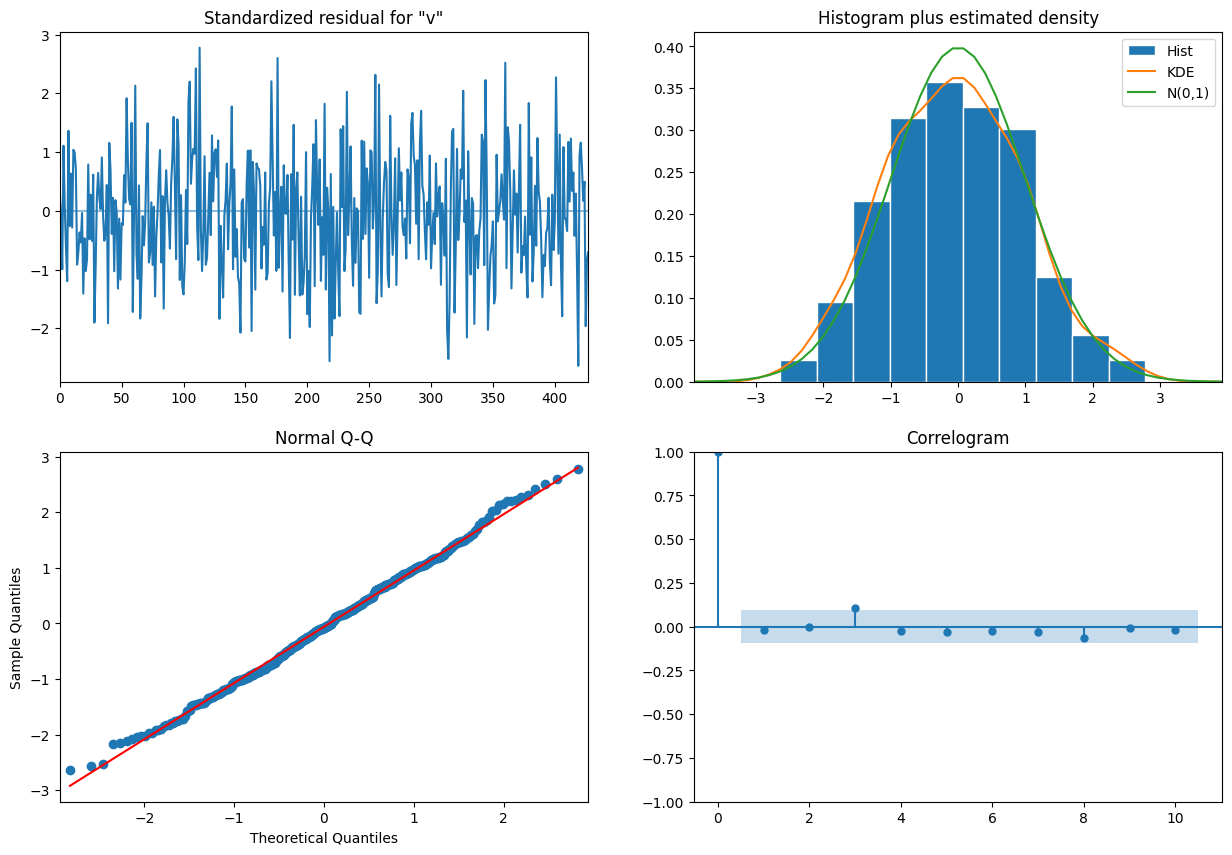

In [ ]:
# Fit the model with the selected parameters from the grid search SARIMA model
[p,d,q] = [1,1,3]
[P,D,Q,S] = [0,1,3,12]
model_SARIMA_grid = SARIMAX(selected_rows['volt'],
                       order=(p,d,q),
                       seasonal_order=(P,D,Q,S),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
result_SARIMA_grid = model_SARIMA_grid.fit()

# Verify the residuals
print(result_SARIMA_grid.summary())
result_SARIMA_grid.plot_diagnostics(figsize=(15, 10));

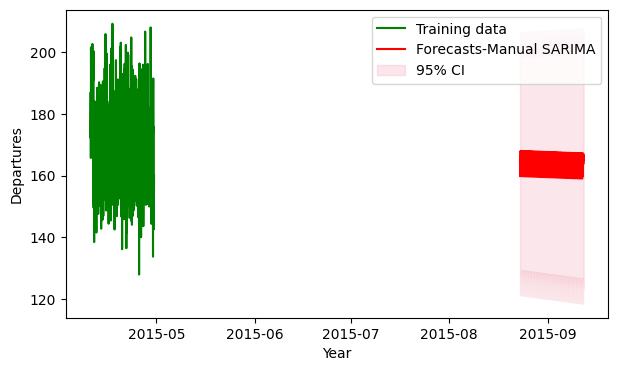

In [ ]:
# Forecasting with Grid Search SARIMA model - Test set
model = result_SARIMA_grid.get_prediction(start= start_time, end= end_time)
df_grid = model.summary_frame()


plt.figure(figsize=(7, 4))
plt.plot(selected_rows['volt'], color='green',label='Training data')
#plt.plot(selected_test['volt'], color='black', label='Testing data')
plt.plot(df_grid['mean'], color='red', label='Forecasts-Manual SARIMA')
plt.fill_between(df_grid.index, df_grid['mean_ci_lower'], df_grid['mean_ci_upper'], alpha=.1, color='crimson', label='95% CI')
plt.xlabel('Year')
plt.ylabel('Departures')
plt.legend();

In [ ]:
from pmdarima import auto_arima

def find_best_arima_parameters(train_data, max_p=5, max_d=2, max_q=5, seasonal=False):
    """
    Find the best suitable values for p, d, and q for an ARIMA model.

    Parameters:
    - train_data: A pandas Series or 1D array containing the training time series data.
    - max_p: The maximum value of p to search for.
    - max_d: The maximum value of d to search for.
    - max_q: The maximum value of q to search for.
    - seasonal: If True, search for seasonal ARIMA parameters as well.

    Returns:
    - A tuple (p, d, q) representing the best ARIMA parameters.
    """
    arima_model = auto_arima(train_data,
                            max_p=max_p,
                            max_d=max_d,
                            max_q=max_q,
                            seasonal=seasonal,
                            stepwise=True,
                            suppress_warnings=True,
                            error_action="ignore")
    return arima_model.order

best_p, best_d, best_q = find_best_arima_parameters(selected_rows['volt'])
print("Best ARIMA Parameters (p, d, q):", best_p, best_d, best_q)

Best ARIMA Parameters (p, d, q): 0 0 3


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(selected_rows['volt'], order=(0,0,3))
model_fit = model.fit()
print(model_fit)
result = model_fit.forecast(steps=5)
result

481    166.830507
482    169.063893
483    169.914923
484    170.678252
485    170.678252
Name: predicted_mean, dtype: float64

In [ ]:
# Ljung-Box Q-Test --> Check for the presence of autocorrelation
LB_AR2 = acorr_ljungbox(model_fit.resid, lags=[10], return_df=True) # [] to consider a single lag, otherwise it will return the values for all the lags up to that number
print('LB p-value for residuals', float(LB_AR2['lb_pvalue']))
print('----------------------------')

# Durbin-Watson Test --> Check for the presence of autocorrelation
dw_google = durbin_watson(model_fit.resid)
print('DW statistic for residuals:', dw_google)
print('----------------------------')

# Jarque-Bera Test --> Check if the sample data has the skewness and kurtosis matching a normal distribution.
jb_statistic = stats.jarque_bera(model_fit.resid)
print('JB p-value for residuals:', jb_statistic.pvalue)

LB p-value for residuals 0.9978049901878573
----------------------------
DW statistic for residuals: 1.9984895737480564
----------------------------
JB p-value for residuals: 0.14513276250566293


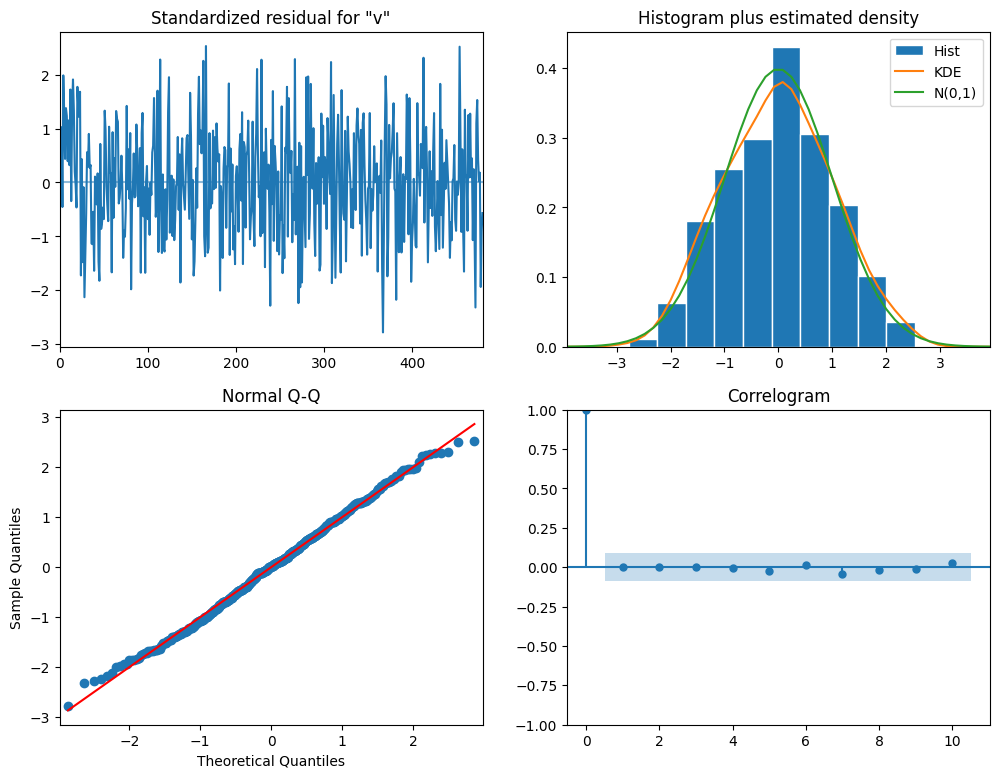

In [ ]:
# To automatically visualise different information related to the residuals
model_fit.plot_diagnostics(figsize=(12,9));

for test set

In [ ]:

time = pd.Timestamp('2015-09-02 06:00:00')

# Define start and end time for the time window
start_time = time - pd.Timedelta(days=10)
end_time = time + pd.Timedelta(days=10)

print("Start Time:", start_time)
print("End Time:", end_time)


Start Time: 2015-08-23 06:00:00
End Time: 2015-09-12 06:00:00


In [ ]:

start_time = pd.Timestamp(start_time)
end_time = pd.Timestamp(end_time)

# Assuming df is your DataFrame containing telemetry data

# Convert the 'datetime' column to Timestamp objects if it's stored as strings
tel1['datetime'] = pd.to_datetime(tel1['datetime'])

# Boolean indexing to select rows within the specified date range
test = tel1[(tel1['datetime'] >= start_time) & (tel1['datetime'] <= end_time)]



In [ ]:
test

datetime  machineID        volt      rotate    pressure  \
5616 2015-08-23 06:00:00          1  159.676352  518.960933   83.226123   
5617 2015-08-23 07:00:00          1  167.880311  483.830709   98.185644   
5618 2015-08-23 08:00:00          1  177.371987  427.190775   98.977378   
5619 2015-08-23 09:00:00          1  169.076476  477.713972  115.329412   
5620 2015-08-23 10:00:00          1  165.742552  404.778225   97.540962   
...                  ...        ...         ...         ...         ...   
6092 2015-09-12 02:00:00          1  193.272570  475.037526  110.898538   
6093 2015-09-12 03:00:00          1  153.597547  376.909783  109.544964   
6094 2015-09-12 04:00:00          1  157.758268  400.270848  109.957682   
6095 2015-09-12 05:00:00          1  164.500059  396.087444   84.844135   
6096 2015-09-12 06:00:00          1  171.889862  425.000549  100.163327   

      vibration  
5616  34.734150  
5617  38.395741  
5618  37.526427  
5619  38.094057  
5620  34.001163  
...         ...  
6092  43.514490  
6093  50.373692  
6094  37.746658  
6095  32.949374  
6096  50.278410  

[481 rows x 6 columns]

In [ ]:
selected_test = test.drop(['machineID', 'rotate', 'pressure', 'vibration'], axis=1)

In [ ]:
selected_test['datetime'] = pd.to_datetime(selected_test['datetime'])

In [ ]:
selected_test

datetime        volt
5616 2015-08-23 06:00:00  159.676352
5617 2015-08-23 07:00:00  167.880311
5618 2015-08-23 08:00:00  177.371987
5619 2015-08-23 09:00:00  169.076476
5620 2015-08-23 10:00:00  165.742552
...                  ...         ...
6092 2015-09-12 02:00:00  193.272570
6093 2015-09-12 03:00:00  153.597547
6094 2015-09-12 04:00:00  157.758268
6095 2015-09-12 05:00:00  164.500059
6096 2015-09-12 06:00:00  171.889862

[481 rows x 2 columns]

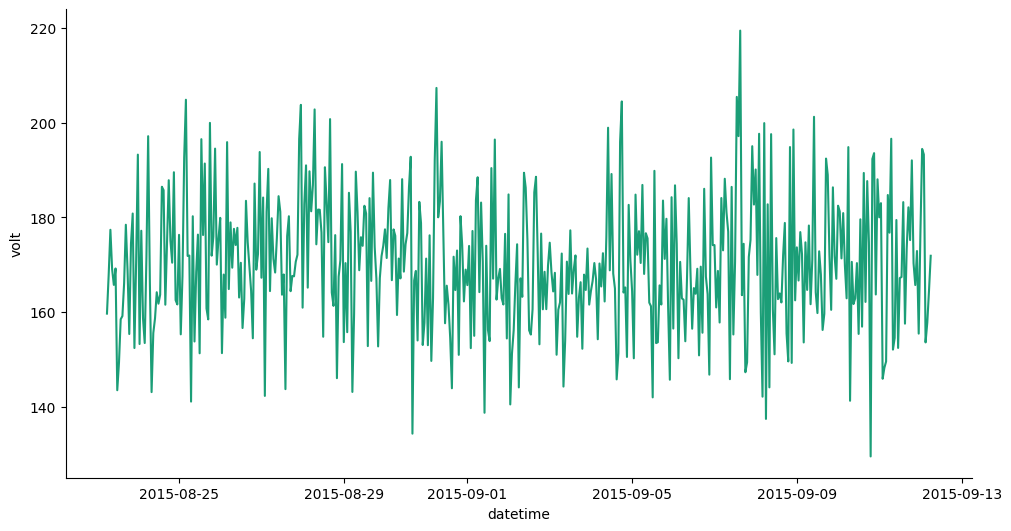

In [ ]:
# @title datetime vs volt

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['volt']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = selected_test.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('volt')

In [ ]:
model = ARIMA(selected_test['volt'], order=(0,0,3))
model_fit = model.fit()
print(model_fit)
result = model_fit.forecast(steps=5)
result

481    170.469215
482    170.607904
483    170.331753
484    170.380192
485    170.380192
Name: predicted_mean, dtype: float64

In [ ]:
# Ljung-Box Q-Test --> Check for the presence of autocorrelation
LB_AR2 = acorr_ljungbox(model_fit.resid, lags=[10], return_df=True) # [] to consider a single lag, otherwise it will return the values for all the lags up to that number
print('LB p-value for residuals', float(LB_AR2['lb_pvalue']))
print('----------------------------')

# Durbin-Watson Test --> Check for the presence of autocorrelation
dw_google = durbin_watson(model_fit.resid)
print('DW statistic for residuals:', dw_google)
print('----------------------------')

# Jarque-Bera Test --> Check if the sample data has the skewness and kurtosis matching a normal distribution.
jb_statistic = stats.jarque_bera(model_fit.resid)
print('JB p-value for residuals:', jb_statistic.pvalue)

LB p-value for residuals 0.2505963894792826
----------------------------
DW statistic for residuals: 1.9956523575677736
----------------------------
JB p-value for residuals: 0.2509778264593357


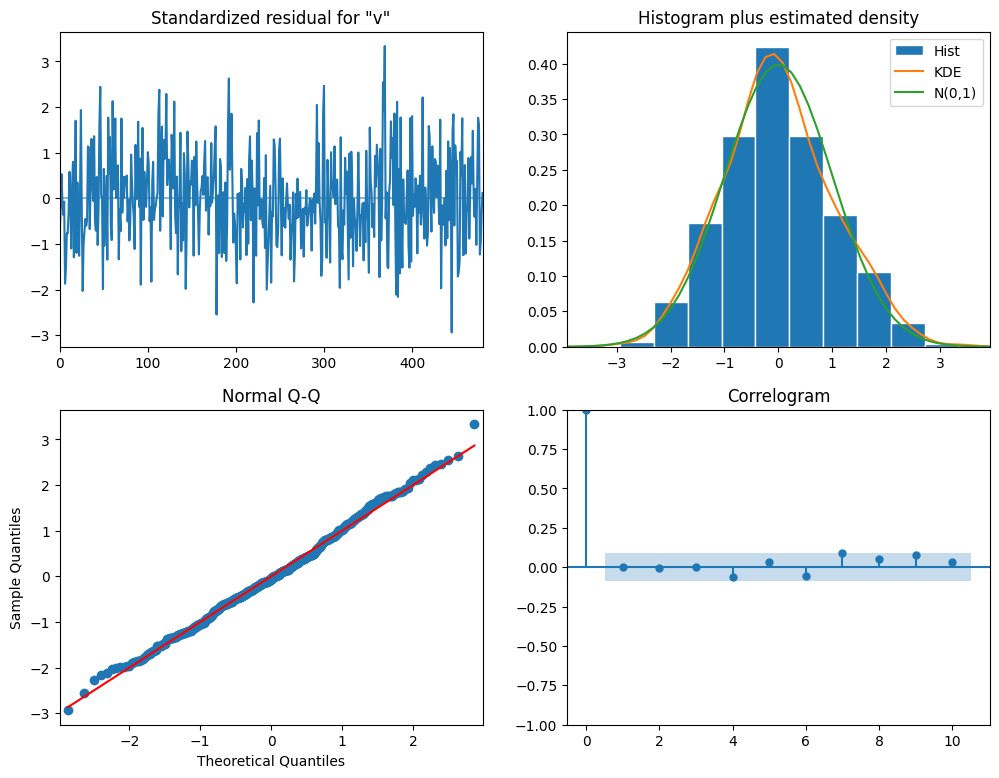

In [ ]:
# To automatically visualise different information related to the residuals
model_fit.plot_diagnostics(figsize=(12,9));

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Model parameter estimations
mod_AR2 = ARIMA(selected_rows['volt'], order=(0,0,3)).fit()

# Visualize the statistics and main results
print(mod_AR2.summary()) # To print all the summary results
print('Estimated Coefficients:', mod_AR2.params) # To print only the coefficients

# Note: sigma2 is the variance of the residuals

                               SARIMAX Results                                
Dep. Variable:                   volt   No. Observations:                  481
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -1982.040
Date:                Wed, 21 Feb 2024   AIC                           3974.080
Time:                        12:45:55   BIC                           3994.960
Sample:                             0   HQIC                          3982.287
                                - 481                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        170.6783      0.825    206.991      0.000     169.062     172.294
ma.L1          0.0717      0.046      1.567      0.117      -0.018       0.161
ma.L2          0.0472      0.048      0.981      0.3

In [ ]:
# Ljung-Box Q-Test --> Check for the presence of autocorrelation
LB_AR2 = acorr_ljungbox(mod_AR2.resid, lags=[10], return_df=True) # [] to consider a single lag, otherwise it will return the values for all the lags up to that number
print('LB p-value for residuals', float(LB_AR2['lb_pvalue']))
print('----------------------------')

# Durbin-Watson Test --> Check for the presence of autocorrelation
dw_google = durbin_watson(mod_AR2.resid)
print('DW statistic for residuals:', dw_google)
print('----------------------------')

# Jarque-Bera Test --> Check if the sample data has the skewness and kurtosis matching a normal distribution.
jb_statistic = stats.jarque_bera(mod_AR2.resid)
print('JB p-value for residuals:', jb_statistic.pvalue)

LB p-value for residuals 0.9978049901878573
----------------------------
DW statistic for residuals: 1.9984895737480564
----------------------------
JB p-value for residuals: 0.14513276250566293


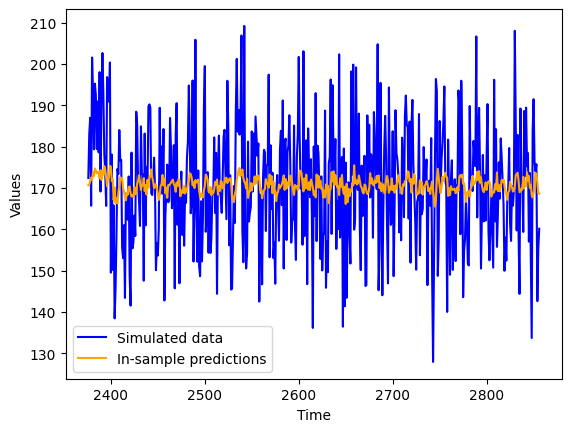

In [ ]:
# Plot data with in-sample predictions
plt.plot(selected_rows['volt'], color='blue',label='Simulated data')
plt.plot(mod_AR2.fittedvalues, color='orange', label='In-sample predictions')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend();

volt        mean    mean_se  mean_ci_lower  mean_ci_upper
2376  170.678252  15.020476     141.238660     200.117844
2377  170.814465  14.974525     141.464936     200.163994
2378  171.681962  14.957960     142.364900     200.999025
2379  172.479911  14.907619     143.261514     201.698308
2380  171.999612  14.905926     142.784535     201.214689
...          ...        ...            ...            ...
2852  173.684527  14.905234     144.470805     202.898249
2853  173.056474  14.905234     143.842751     202.270196
2854  171.457563  14.905234     142.243841     200.671285
2855  168.765712  14.905234     139.551990     197.979434
2856  168.594681  14.905234     139.380959     197.808403

[481 rows x 4 columns]

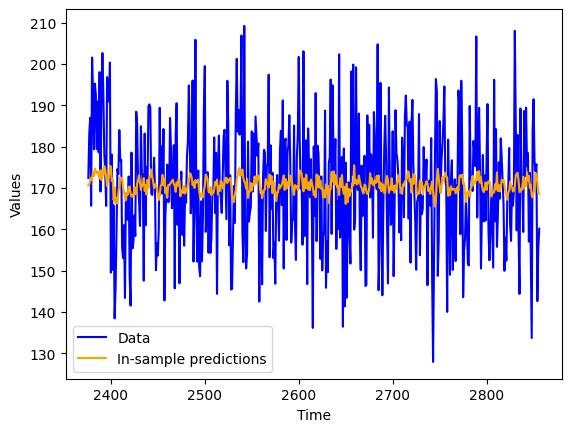

In [ ]:
# Forecasting out-of-sample data
prediction_AR2 = mod_AR2.get_prediction()
df = prediction_AR2.summary_frame()
display(df)

plt.plot(selected_rows['volt'],'-b', label='Data')
plt.plot(mod_AR2.fittedvalues, 'orange', label='In-sample predictions')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend();